# Final Project Submission

Please fill out:
* Student name: **Brian Bentson**
* Student pace: self paced / part time / full time: **Full Time**
* Scheduled project review date/time:
* Instructor name: **James Irving**
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

# Table of Contents

*Click to jump to matching Markdown Header.*<br>
 
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[DATA COLLECTION](#DATA-COLLECTION)**<br>
- **[DATA CLEANING](#DATA-CLEANING)**<br>
- **[DATA EXPLORATION](#DATA-EXPLORATION)**<br>
- **[DATA MODELING](#DATA-MODELING)**<br>
- **[DATA INTERPRETATION](#DATA-INTERPRETATION)**<br>
- **[RECOMMENDATIONS AND CONCLUSIONS](#RECOMMENDATIONS-AND-CONCLUSIONS)<br>**

# INTRODUCTION

The Tanzanian Ministry of Water tracks vital information on water wells in its country to best ensure citizens are provided with a continual source of fresh water. A dataset housing this crucial information can be found [HERE](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/). 

I will be utilizing this dataset to train a classification model to accurately predict which water wells are not functional and also to gain insights into potential reasons for water well failures.

## Business Statement

It is undoubtedly obvious how crucial a consistent water supply is to every living thing in this world. Without it, life is not sustainable. A human can survive without food on average for about 1 to 2 months. However, a human can only survive 3 days without water! This time-frame without water can be shortened even further in climates which are extremely hot and humid. Tanzania, located on the east coast of Africa on the Indian Ocean, has parts of the country that are extremely hot and humid. The average high and low temperature in the most populous city of Dar es Salaam during the year is 86$^\circ$F and 70$^\circ$F, respectively. Dar es Salaam is located on the coast and has a average relative humidity of 70%. 

It is, therefore, extremely imperative to be able to supply a consistent source of fresh water for sustainment of human life in Tanzania. This begins with the evaluation of water wells in Tanzania with an emphasis on how reliability can be maximized to ensure a consistent supply of water is attainable. Unfortunately, our reliance on equipment (in this case a mechanical pump) means that 100% reliability can never be achieved. It is best to consider both reliability of the equipment and how quickly we can respond to an equipment failure and get it back to a running state. The response time to fixing a mechanical failure can be shortened with first predicting which water wells will fail. This key information can help maintenance organizations to ensure they have labor, tools and supplies ready to be mobilized in case of a failure. I will use machine learning to build a model to best predict water well failures in an attempt to understand what improvements can be made to factors such as funding, technology and maintenance operations.



## Analysis Methodology

The dataset has information on 59,400 water wells in Tanzania, for which only 55% are fully operational based on this dataset. Information on these water wells includes many important factors that impact their operability and will be explored in order to provide insight into how reliability, and therefore accessibility, can be maximized. I will clean and explore the data to best be utilized with a classification machine learning model to predict failure. 

# DATA COLLECTION

## Import Packages

In [1951]:
#data wrangling and visualization packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import scipy.stats as stats
#feature engineering packages
from sklearn.impute import SimpleImputer


#modeling packages
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#modeling evaluation packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [1882]:
#notebook settings
pd.set_option("display.max_columns", 40)
pd.options.display.float_format = '{:,}'.format

## Global Functions

In [1943]:
def col_eval(df, num_col=None, cat_col=None, y_col='status_group', label_count=25, thresh=0.025):
    '''
    
    '''
    if num_col != None:
        #print the column name
        print(f'Column Name: {num_col}')
        print('\n')
        #print the number of unique values
        print(f'Number of unique values: {df[num_col].nunique()}')
        print('\n')
        #print the number of duplicate values
        print(f'There are {df[num_col].duplicated().sum()} duplicates')
        print('\n')
        #print the number of null values
        print(f'There are {df[num_col].isna().sum()} null values')
        print('\n')
        #print the number of values equal to 0
        print(f'There are {(df[num_col] == 0).sum()} zeros')
        print('\n')
        #print the value counts percentage
        print('Value Counts Percentage', '\n', 
              df[num_col].value_counts(normalize=True, dropna=False).round(2)*100)
        print('\n')
        #print descriptive statistics
        print('Descriptive Metrics:','\n',
              df[num_col].describe())
        #plot boxplot, histogram         
        fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
        
        histogram = df[num_col].hist(ax=ax[0,0])
        ax[0,0].set_title(f'Distribution of {num_col}');
        
        scatter = df.plot(kind='scatter', x=num_col, y=y_col,ax=ax[0,1]);
        ax[0,1].set_title(f'{y_col} vs {num_col}');

        boxplot = df.boxplot(column=num_col, ax=ax[1,0]);
        ax[1,0].set_title(f'Boxplot of {num_col}');

        sm.graphics.qqplot(df[num_col], dist=stats.norm, line='45', fit=True, ax=ax[1,1])
        ax[1,1].set_title(f'QQ plot of {num_col}');
        plt.tight_layout()

        plt.show()
        return
    
    else:
        
        for col in cat_col:
            print('=============================================================')
            #print the column name
            print(f'Column Name: {col}')
            print('\n')
            #print the number of unique values
            print(f'Number of unique values: {df[col].nunique()}')
            print('\n')
            #print the number of duplicate values
            print(f'There are {df[col].duplicated().sum()} duplicates')
            print('\n')
            #print the number of null values
            print(f'There are {df[col].isna().sum()} null values')
            print('\n')
            #print the number of values equal to '0'
            print(f'There are {(df[col] == "0").sum()} zeros')
            print('\n')
            #print the value counts percentage
            print('Value Counts Percentage', '\n', 
                  df[col].value_counts(dropna=False).round(2))
            print('\n')

            #plot barplot, histogram         
            fig, ax = plt.subplots(figsize=(15,10))

            bar_graph = df[col].value_counts(normalize=True, 
                                             dropna=False)[:label_count].plot.bar(label=f'{col} Percentage')
            ax.axhline(y=thresh, color='red', linestyle='--', 
                        label=f'{thresh*100}% Threshold')
            ax.set_title(f'{col} Value Counts')
            ax.set_xlabel(f'{col} Labels')
            ax.set_ylabel('Percentage')
            ax.legend()

            plt.tight_layout()

            plt.show()
        return

In [1884]:
def rare_labels(df, col_name, thresh=.01):

    df_temp = pd.Series(df[col_name].value_counts(normalize=True))

    rare_dict = {
        label: ('Rare' if label not in df_temp[df_temp >= thresh].index else label)
        for label in df_temp.index
    }

    # now I replace the rare categories
    tmp = df[col_name].map(rare_dict)

    return tmp

In [1885]:
#function to look at plots and stats of column with or without outliers
def get_plots_updated(df, x_col, y_col='price', outlier='none'):
    
    """This function takes in a dataframe and a column, removes outliers using
       standard deviations or iqr and produces a histogram, scatter plot and
       boxplot of the values with descriptive statistics"""

    #plots for std
    if outlier == 'std':
        #create variables
        col_mean = df[x_col].mean()
        col_std = df[x_col].std()
        upper_thresh_std = col_mean + 3*col_std
        lower_thresh_std = col_mean - 3*col_std
        
        #create new df
        idx_std_outliers = (df[x_col] > lower_thresh_std) & (df[x_col] < upper_thresh_std)
        clean_df = df.loc[idx_std_outliers]
        
        
    elif outlier == 'iqr':
        #create variables
        q25 = df[x_col].quantile(0.25)
        q75 = df[x_col].quantile(0.75)
        iqr = q75-q25
        upper_thresh_iqr = q75 + 1.5*iqr
        lower_thresh_iqr = q25 - 1.5*iqr
        
        #create new df
        idx_iqr_outliers = (df[x_col] > lower_thresh_iqr) & (df[x_col] < upper_thresh_iqr)
        clean_df = df.loc[idx_iqr_outliers]
        

    elif outlier == 'none':
        df_clean = df
        #plots
    
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10));
    histogram = df_clean[x_col].hist(ax=ax[0,0]);
    ax[0,0].set_title(f'Distribution of {x_col}');

    scatter = df_clean.plot(kind='scatter', x=x_col, y=y_col,ax=ax[0,1]);
    ax[0,1].set_title(f'{y_col} vs {x_col}');

    boxplot = df_clean.boxplot(column=x_col, ax=ax[1,0]);
    ax[1,0].set_title(f'Boxplot of {x_col}');

    sm.graphics.qqplot(df_clean[x_col], dist=stats.norm, line='45', fit=True, ax=ax[1,1])
    ax[1,1].set_title(f'QQ plot of {x_col}');

    #stats
    desc_stats = df_clean[x_col].describe()
    plt.tight_layout()

        
    print(desc_stats)
    plt.show()
    
    return

## Import Data into Pandas

In [1886]:
#create dataframe
df_original = pd.read_csv('Data/water_well_data.csv')
df_original.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,...,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,"6,000.0",2011-03-14,Roman,1390,Roman,34.93809275,-9.85632177,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,...,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,...,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.46066446,-3.82132853,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,...,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,...,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.13084671,-1.82535885,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,...,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Data Schema

**Taken from:** https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

- `amount_tsh` - Total static head (amount water available to waterpoint)
- `date_recorded` - The date the row was entered
- `funder` - Who funded the well
- `gps_height` - Altitude of the well
- `installer` - Organization that installed the well
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `wpt_name` - Name of the waterpoint if there is one
- `num_private` -
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `region` - Geographic location
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)
- `lga` - Geographic location
- `ward` - Geographic location
- `population` - Population around the well
- `public_meeting` - True/False
- `recorded_by` - Group entering this row of data
- `scheme_management` - Who operates the waterpoint
- `scheme_name` - Who operates the waterpoint
- `permit` - If the waterpoint is permitted
- `construction_year` - Year the waterpoint was constructed
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint



**Supplemental Resources**

Column abbrevation meanings: https://pdf.usaid.gov/pdf_docs/PA00JZJ5.pdf

## Investigate Data

I will briefly investigate null values, column names and data types before diving into more specific preprocessing.

In [1887]:
#evaluate dataframe null values, column names and data types
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

> **OBSERVATIONS**
> - Many columns to explore for null value imputation
> - Column names are already standardized
> - Data types will require further evaluation during feature engineering

In [1888]:
#evaluate numerical data descriptive statistics
df_original.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,"59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0","59,400.0"
mean,"37,115.131767676765",317.6503846801347,668.297239057239,34.077426692028794,-5.706032659626431,0.47414141414141414,15.297003367003366,5.629747474747475,179.90998316498317,"1,300.6524747474748"
std,"21,453.12837131775","2,997.574558142169",693.11635032505,6.567431845646531,2.946019081267248,12.236229810496686,17.58740633733205,9.633648629454566,471.48217573848035,951.6205473151729
min,0.0,0.0,-90.0,0.0,-11.64944018,0.0,1.0,0.0,0.0,0.0
25%,"18,519.75",0.0,0.0,33.09034738,-8.540621305,0.0,5.0,2.0,0.0,0.0
50%,"37,061.5",0.0,369.0,34.90874343,-5.021596649999999,0.0,12.0,3.0,25.0,"1,986.0"
75%,"55,656.5",20.0,"1,319.25",37.17838657,-3.3261556399999996,0.0,17.0,5.0,215.0,"2,004.0"
max,"74,247.0","350,000.0","2,770.0",40.34519307,-2e-08,"1,776.0",99.0,80.0,"30,500.0","2,013.0"


> **OBSERVATIONS**
> - Many of these numerical features should be transformed into a categorical feature
> - `num_private`, `construction_year`, `population`, and `district_code` has a minimum of 0 which may be a placeholder for unknown
> - `amount_tsh` needs to be explored further as there seem to be a lot of 0's as the median is 0 while the mean is 317.

# DATA CLEANING

In this section, I will focus on understanding the raw data quality and cleaning the data in preparation for data exploration and visualization. Feature engineering for modeling will be done in the [DATA_MODELING](#DATA-MODELING) section.

## Numerical Features

Here I will evaluate all numerical features for feature engineering.

### Feature Evaluation

In this section I will focus on understanding each column and outlining the actions I will take in dedicated preprocessing sections later on.

In [1890]:
#create list of all numeric columns
num_cols = df_clean.select_dtypes(exclude='object').columns
print(f'There are {len(num_cols)} numerical columns: \n {num_cols}')

There are 10 numerical columns: 
 Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')


In [1891]:
#display first 5 rows of numeric columns
df_clean[num_cols].head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,"6,000.0",1390,34.93809275,-9.85632177,0,11,5,109,1999
1,8776,0.0,1399,34.6987661,-2.14746569,0,20,2,280,2010
2,34310,25.0,686,37.46066446,-3.82132853,0,21,4,250,2009
3,67743,0.0,263,38.48616088,-11.15529772,0,90,63,58,1986
4,19728,0.0,0,31.13084671,-1.82535885,0,18,1,0,0


Column Name: id


Number of unique values: 59400


There are 0 duplicates


There are 0 null values


There are 1 zeros


Value Counts Percentage 
 2047    0.0
72310   0.0
49805   0.0
51852   0.0
62091   0.0
         ..
46396   0.0
36155   0.0
34106   0.0
38200   0.0
0       0.0
Name: id, Length: 59400, dtype: float64


Descriptive Metrics: 
 count              59,400.0
mean    37,115.131767676765
std      21,453.12837131775
min                     0.0
25%               18,519.75
50%                37,061.5
75%                55,656.5
max                74,247.0
Name: id, dtype: float64


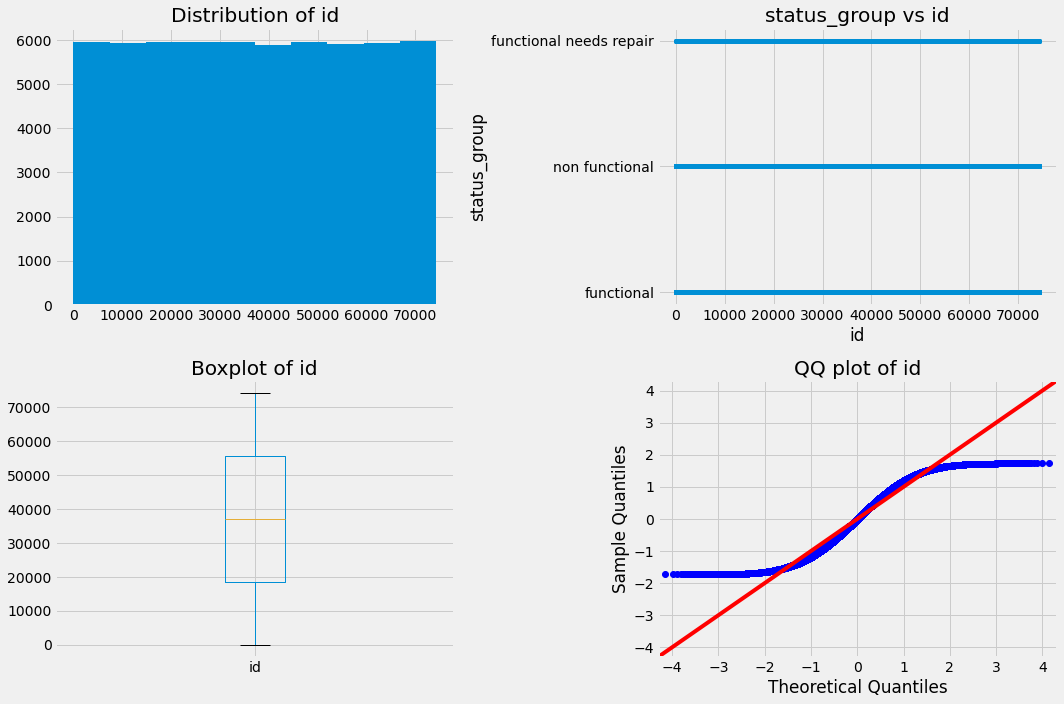

In [1892]:
#eval id feature
col_eval(df_clean, num_col='id')

> **OBSERVATIONS**
> - `id` should be changed to categorical as it is a unique identifier for each well

> **ACTIONS**
> - Will recast `id` as categorical

Column Name: amount_tsh


Number of unique values: 98


There are 59302 duplicates


There are 0 null values


There are 41639 zeros


Value Counts Percentage 
 0.0         70.0
500.0        5.0
50.0         4.0
1,000.0      3.0
20.0         2.0
            ... 
8,500.0      0.0
6,300.0      0.0
220.0        0.0
138,000.0    0.0
12.0         0.0
Name: amount_tsh, Length: 98, dtype: float64


Descriptive Metrics: 
 count             59,400.0
mean     317.6503846801347
std     2,997.574558142169
min                    0.0
25%                    0.0
50%                    0.0
75%                   20.0
max              350,000.0
Name: amount_tsh, dtype: float64


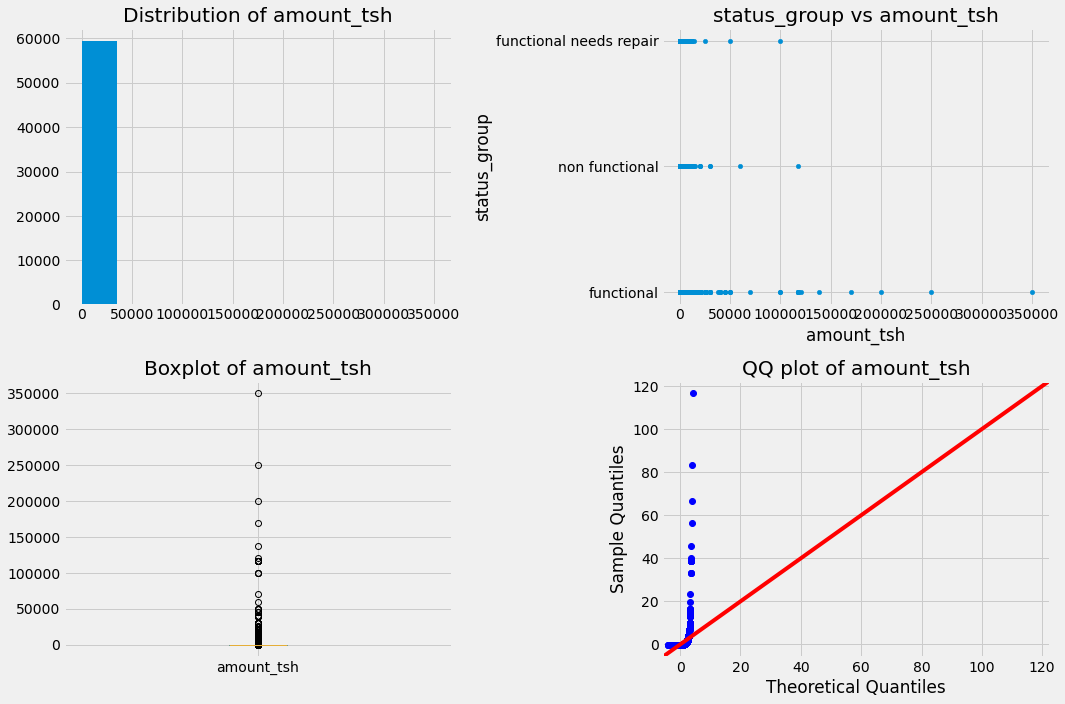

In [1893]:
#eval amount_tsh feature
col_eval(df_clean, num_col='amount_tsh')

> **OBSERVATIONS**
> - `amount_tsh` has many 0's and needs to be evaluated for imputation and outliers
> - there are extreme outliers on the high end

> **ACTIONS**
> - I will remove outliers but keep 0's as I believe they do appropriately represent the amount of head on the waterpoint, especially because some of the water comes from rain water capture, lakes and rivers, all of which would have 0 static head.

Column Name: gps_height


Number of unique values: 2428


There are 56972 duplicates


There are 0 null values


There are 20438 zeros


Value Counts Percentage 
  0      34.0
-15      0.0
-16      0.0
-13      0.0
-20      0.0
        ... 
 2285    0.0
 2424    0.0
 2552    0.0
 2413    0.0
 2385    0.0
Name: gps_height, Length: 2428, dtype: float64


Descriptive Metrics: 
 count           59,400.0
mean    668.297239057239
std      693.11635032505
min                -90.0
25%                  0.0
50%                369.0
75%             1,319.25
max              2,770.0
Name: gps_height, dtype: float64


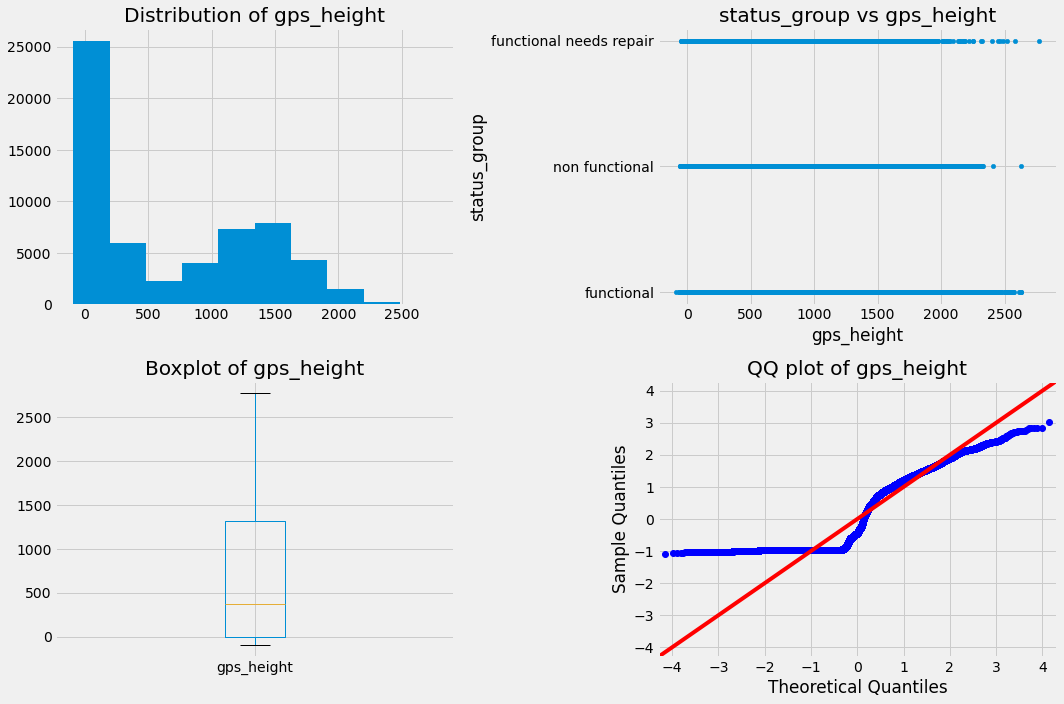

In [1894]:
#eval gps_height
col_eval(df_clean, num_col='gps_height')

> **OBSERVATIONS**
> - There are many 0's which could mean the well is at sea level or it is a placeholder for unknown
> - Does not seem to have extreme outliers

> **ACTIONS**
> - I will keep the 0's as I believe they indicate wells which are at sea level and not missing values.

Column Name: longitude


Number of unique values: 57516


There are 1884 duplicates


There are 0 null values


There are 1812 zeros


Value Counts Percentage 
 0.0           3.0
39.08887513   0.0
39.10530661   0.0
37.54340145   0.0
38.18053774   0.0
               ..
38.71052037   0.0
40.11702941   0.0
34.67296206   0.0
39.43360353   0.0
34.89083819   0.0
Name: longitude, Length: 57516, dtype: float64


Descriptive Metrics: 
 count             59,400.0
mean    34.077426692028794
std      6.567431845646531
min                    0.0
25%            33.09034738
50%            34.90874343
75%            37.17838657
max            40.34519307
Name: longitude, dtype: float64


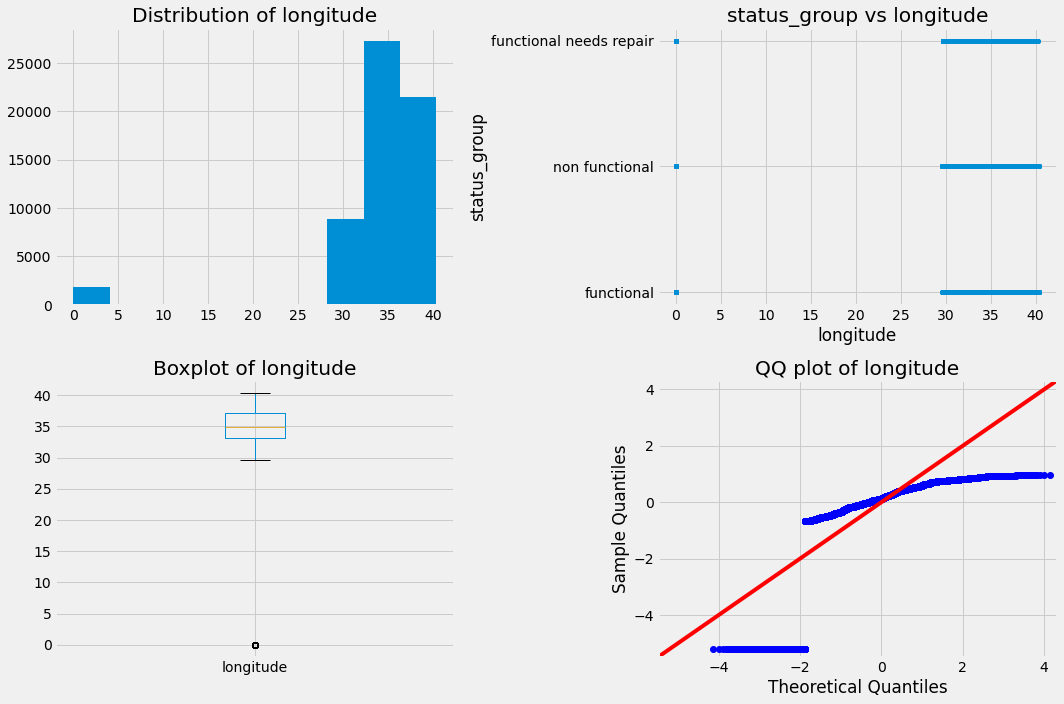

In [1978]:
col_eval(df_clean, num_col='longitude')

In [1984]:
df = df_clean.loc[df_clean['longitude'] == 0,['amount_tsh','gps_height','population','construction_year']]

0    1812
Name: construction_year, dtype: int64

> **OBSERVATIONS**
> - Every numerical column is 0 when longitude is 0 (1812 rows or 3% of the data). I do not see a valid way to impute these columns.

> - Drop 1812 rows

Column Name: num_private


Number of unique values: 65


There are 59335 duplicates


There are 0 null values


There are 58643 zeros


Value Counts Percentage 
 0     99.0
6      0.0
1      0.0
5      0.0
8      0.0
      ... 
180    0.0
213    0.0
23     0.0
55     0.0
94     0.0
Name: num_private, Length: 65, dtype: float64


Descriptive Metrics: 
 count              59,400.0
mean    0.47414141414141414
std      12.236229810496686
min                     0.0
25%                     0.0
50%                     0.0
75%                     0.0
max                 1,776.0
Name: num_private, dtype: float64


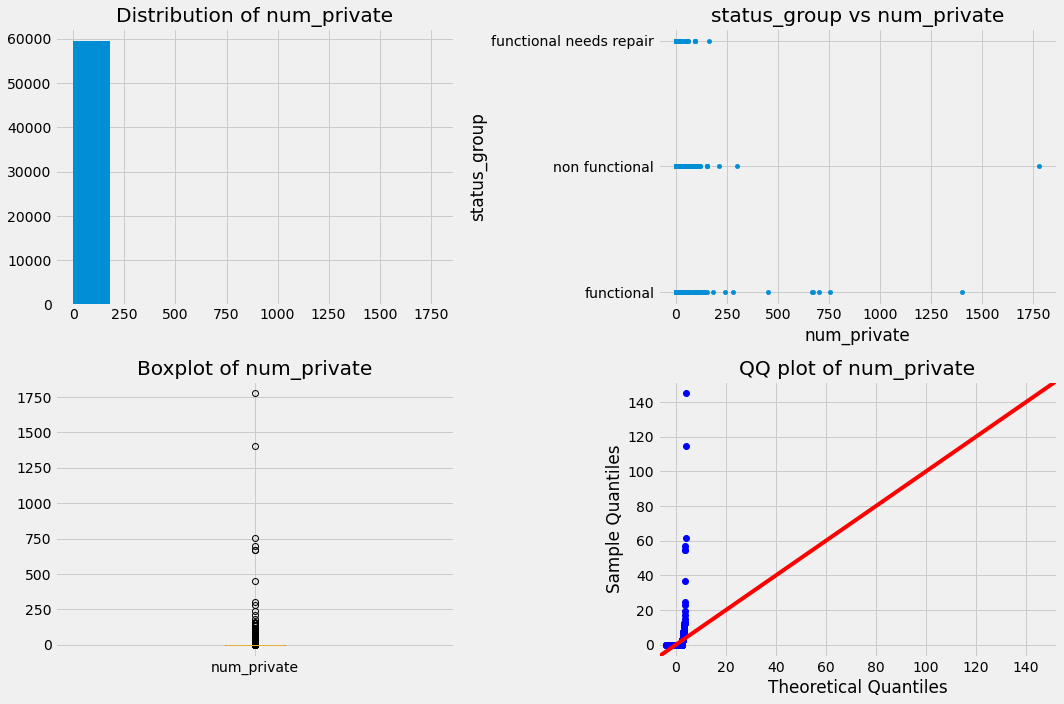

In [1895]:
#eval num_private
col_eval(df_clean, num_col='num_private')

> **OBSERVATIONS**
> - Because `num_private` is dominated by a single value (98.7% zero) and the data schema does not clearly state what it means, I will drop this column from the analysis.

> **ACTIONS**
> - Drop `num_private` column

Column Name: region_code


Number of unique values: 27


There are 59373 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 11                 9.0
17                 8.0
12                 8.0
3    7.000000000000001
5    7.000000000000001
18                 6.0
19                 5.0
2                  5.0
16                 5.0
10                 4.0
4                  4.0
1                  4.0
13                 4.0
14                 3.0
20                 3.0
15                 3.0
6                  3.0
21                 3.0
80                 2.0
60                 2.0
90                 2.0
7                  1.0
99                 1.0
9                  1.0
24                 1.0
8                  1.0
40                 0.0
Name: region_code, dtype: float64


Descriptive Metrics: 
 count             59,400.0
mean    15.297003367003366
std      17.58740633733205
min                    1.0
25%                    5.0
50%                   12.0


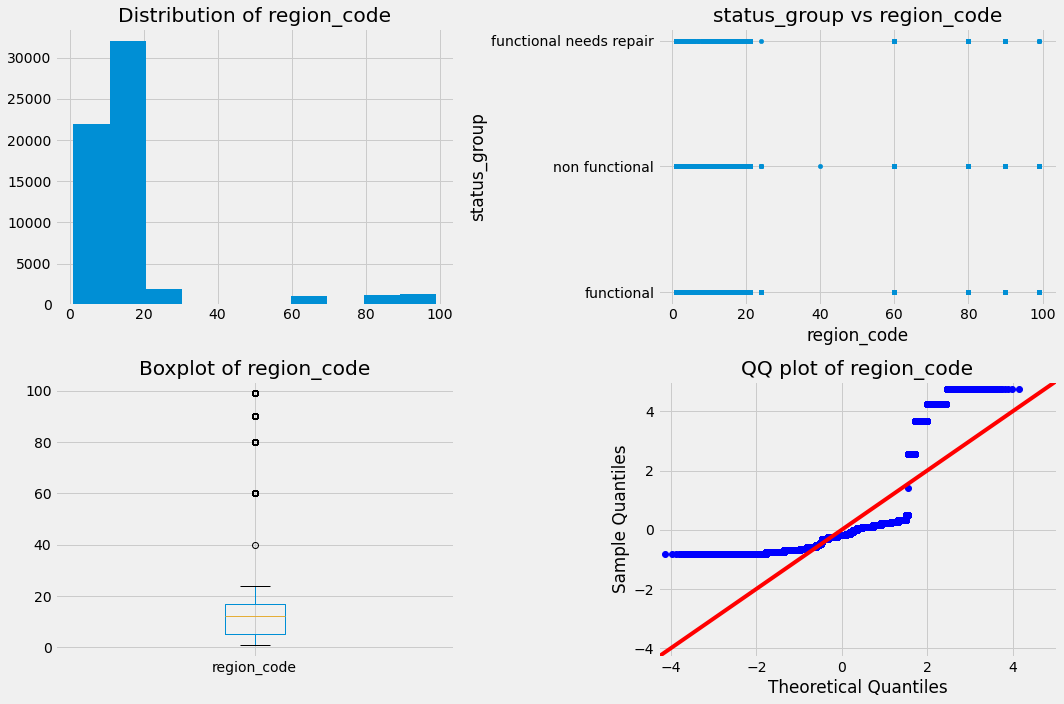

In [1896]:
#eval region_code
col_eval(df_clean, num_col='region_code')

> **OBSERVATIONS**
> - `region_code` seems to represent a specific region and does not represent an actual numerical value.

> **ACTIONS**
> - convert `region_code` to a categorical feature

Column Name: district_code


Number of unique values: 20


There are 59380 duplicates


There are 0 null values


There are 23 zeros


Value Counts Percentage 
 1                 21.0
2                 19.0
3                 17.0
4                 15.0
5    7.000000000000001
6    7.000000000000001
7                  6.0
8                  2.0
30                 2.0
33                 1.0
53                 1.0
43                 1.0
13                 1.0
23                 0.0
63                 0.0
62                 0.0
60                 0.0
0                  0.0
80                 0.0
67                 0.0
Name: district_code, dtype: float64


Descriptive Metrics: 
 count            59,400.0
mean    5.629747474747475
std     9.633648629454566
min                   0.0
25%                   2.0
50%                   3.0
75%                   5.0
max                  80.0
Name: district_code, dtype: float64


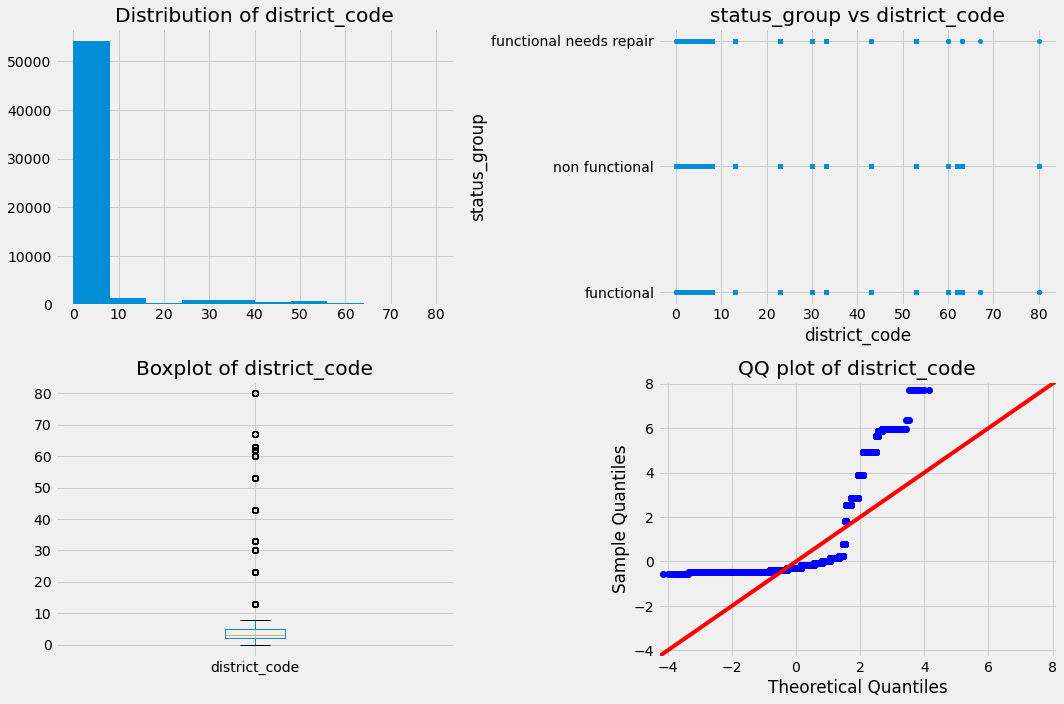

In [1897]:
#eval district_code
col_eval(df_clean, num_col='district_code')

> **OBSERVATIONS**
> - `district_code` seems to represent a specific region and does not represent an actual numerical value.

> **ACTIONS**
> - convert `district_code` to a categorical feature

Column Name: population


Number of unique values: 1049


There are 58351 duplicates


There are 0 null values


There are 21381 zeros


Value Counts Percentage 
 0      36.0
1      12.0
200     3.0
150     3.0
250     3.0
       ... 
3241    0.0
1960    0.0
1685    0.0
2248    0.0
1439    0.0
Name: population, Length: 1049, dtype: float64


Descriptive Metrics: 
 count             59,400.0
mean    179.90998316498317
std     471.48217573848035
min                    0.0
25%                    0.0
50%                   25.0
75%                  215.0
max               30,500.0
Name: population, dtype: float64


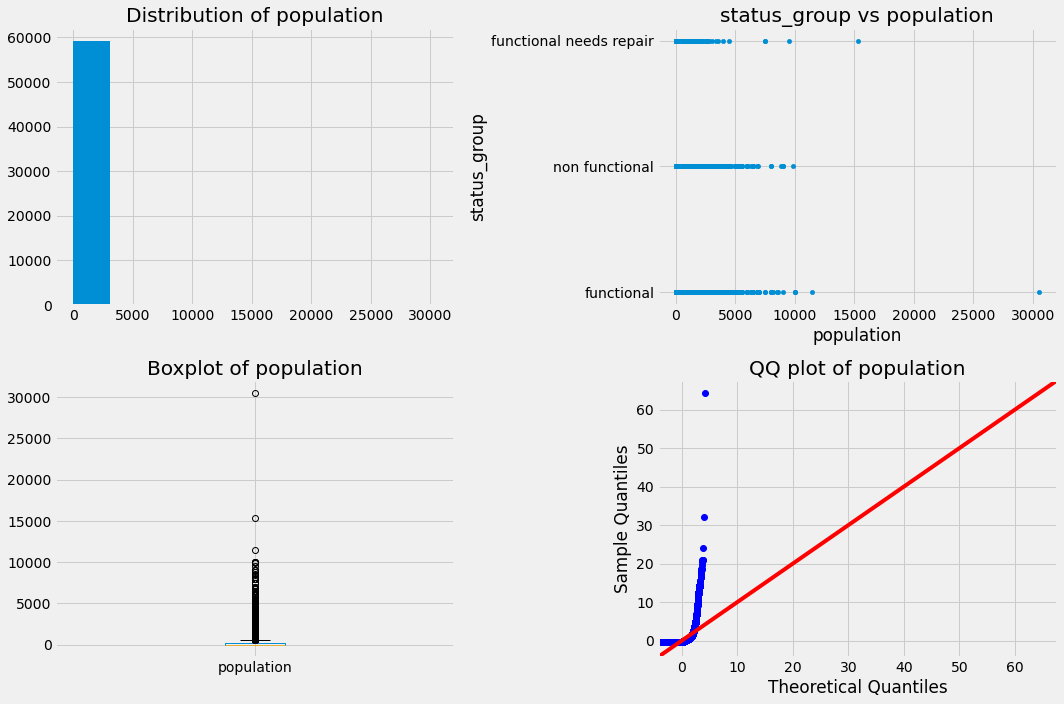

In [1898]:
#eval population
col_eval(df_clean, num_col='population')

> **OBSERVATIONS**
> - `population` has many 0's which could either represent wells with no population around them or a placeholder for unknown.

> **ACTIONS**
> - I will leave the 0's as they are logical values 

Column Name: construction_year


Number of unique values: 55


There are 59345 duplicates


There are 0 null values


There are 20709 zeros


Value Counts Percentage 
 0      35.0
2010    4.0
2008    4.0
2009    4.0
2000    4.0
2007    3.0
2006    2.0
2003    2.0
2011    2.0
2004    2.0
2012    2.0
2002    2.0
1978    2.0
1995    2.0
2005    2.0
1999    2.0
1998    2.0
1990    2.0
1985    2.0
1980    1.0
1996    1.0
1984    1.0
1982    1.0
1994    1.0
1972    1.0
1974    1.0
1997    1.0
1992    1.0
1993    1.0
2001    1.0
1988    1.0
1983    1.0
1975    1.0
1986    1.0
1976    1.0
1970    1.0
1991    1.0
1989    1.0
1987    1.0
1981    0.0
1977    0.0
1979    0.0
1973    0.0
2013    0.0
1971    0.0
1960    0.0
1967    0.0
1963    0.0
1968    0.0
1969    0.0
1964    0.0
1962    0.0
1961    0.0
1965    0.0
1966    0.0
Name: construction_year, dtype: float64


Descriptive Metrics: 
 count              59,400.0
mean    1,300.6524747474748
std       951.6205473151729
min                    

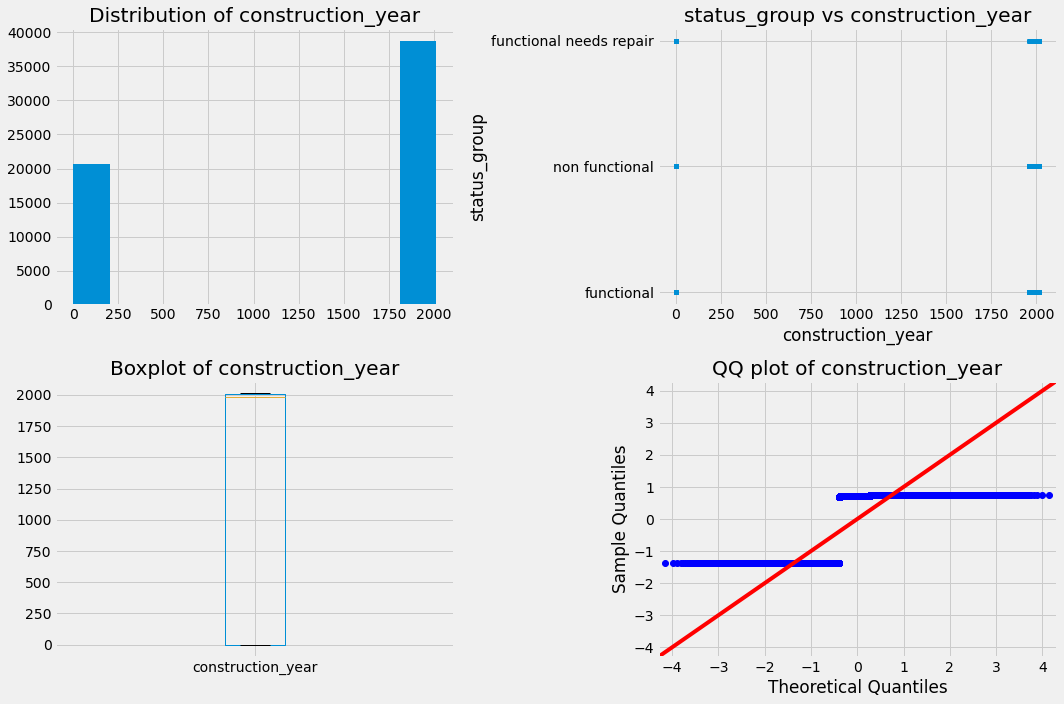

In [1899]:
#eval construction_year
col_eval(df_clean, num_col='construction_year')

> **OBSERVATIONS**
> - `construction_year` has many 0's which have to be placeholders for unknown. Imputation could be done by geographic location or based on most common construction years that are known.

> **ACTIONS**
> - Impute `construction_year` to eliminate the 0's

> **SUMMARY OF ACTIONS TO TAKE**
> - recast `id` as categorical
> - recast `region_code` as categorical
> - recast `district_code` as categorical
> - impute `construction_year`
> - drop `num_private`

### Data Type Recasting

I will change data types for numeric features here.

In [1900]:
#convert id to categorical
df_clean['id'] = df_clean['id'].astype('object')

In [1901]:
#convert region_code to categorical
df_clean['region_code'] = df_clean['region_code'].astype('object')

In [1902]:
#convert district_code to categorical
df_clean['district_code'] = df_clean['district_code'].astype('object')

In [1903]:
#update num_cols
num_cols = df_clean.select_dtypes(exclude='object').columns
num_cols

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'population', 'construction_year'],
      dtype='object')

In [1904]:
#review dataframe
df_clean[num_cols]

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
0,"6,000.0",1390,34.93809275,-9.85632177,0,109,1999
1,0.0,1399,34.6987661,-2.14746569,0,280,2010
2,25.0,686,37.46066446,-3.82132853,0,250,2009
3,0.0,263,38.48616088,-11.15529772,0,58,1986
4,0.0,0,31.13084671,-1.82535885,0,0,0
...,...,...,...,...,...,...,...
59395,10.0,1210,37.16980689,-3.25384746,0,125,1999
59396,"4,700.0",1212,35.24999126,-9.0706288,0,56,1996
59397,0.0,0,34.01708706,-8.75043433,0,0,0
59398,0.0,0,35.86131531,-6.37857327,0,0,0


### Feature Drop

I will drop any unecessary numeric features here. 

In [1905]:
#drop num_private 
df_clean.drop(columns='num_private', inplace=True)

In [1906]:
#update num_cols
num_cols = df_clean.select_dtypes(exclude='object').columns
num_cols

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'construction_year'],
      dtype='object')

In [1907]:
#review dataframe
df_clean[num_cols]

,amount_tsh,gps_height,longitude,latitude,population,construction_year
0,"6,000.0",1390,34.93809275,-9.85632177,109,1999
1,0.0,1399,34.6987661,-2.14746569,280,2010
2,25.0,686,37.46066446,-3.82132853,250,2009
3,0.0,263,38.48616088,-11.15529772,58,1986
4,0.0,0,31.13084671,-1.82535885,0,0
...,...,...,...,...,...,...
59395,10.0,1210,37.16980689,-3.25384746,125,1999
59396,"4,700.0",1212,35.24999126,-9.0706288,56,1996
59397,0.0,0,34.01708706,-8.75043433,0,0
59398,0.0,0,35.86131531,-6.37857327,0,0


### Feature Engineering

In this section I will develop new features which I believe will improve the ability to gain insights into the data and possibly help modeling.

In [1819]:
df_clean[num_cols].head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year
0,"6,000.0",1390,34.93809275,-9.85632177,109,1999
1,0.0,1399,34.6987661,-2.14746569,280,2010
2,25.0,686,37.46066446,-3.82132853,250,2009
3,0.0,263,38.48616088,-11.15529772,58,1986
4,0.0,0,31.13084671,-1.82535885,0,0


#### `well_age`

`well_age` will allow insight into how age of the well impacts operability. This feature will be created by taking the max of `recorded_date` and subtracting the `construction_year`. I will also need to see how I can impute when the `construction_year` is "0".

In [1820]:
#extract the year from date_recorded feature
df_clean['date_recorded_yr'] = pd.DatetimeIndex(df_clean['date_recorded']).year
df_clean[['date_recorded_yr','date_recorded']].head()

,date_recorded_yr,date_recorded
0,2011,2011-03-14
1,2013,2013-03-06
2,2013,2013-02-25
3,2013,2013-01-28
4,2011,2011-07-13


In [1821]:
#drop date_recorded as it does not add anymore value
df_clean.drop(columns='date_recorded', inplace=True)

In [1822]:
#check for date_recorded_year year earlier than construction year
df_clean.loc[df_clean['date_recorded_yr'] < df_clean['construction_year'], ['id']].count()

id    9
dtype: int64

> **OBSERVATIONS**
> - There are 9 records where the `date_recorded_yr` is prior to the `construction_year`. 

> **ACTIONS**
> - I will remove these 9 rows.

In [1823]:
#drop 9 rows
df_clean.drop(df_clean.loc[df_clean['date_recorded_yr'] < 
                           df_clean['construction_year']].index, inplace=True)

In [1824]:
#check for failure year earlier than construction year
df_clean.loc[df_clean['date_recorded_yr'] < df_clean['construction_year'], ['id']].count()

id    0
dtype: int64

In [1825]:
#create well_age feature
df_clean['well_age'] = df_clean['date_recorded_yr'].max() - df_clean['construction_year']
df_clean['well_age'].value_counts().head()

2013    20709
3        2645
5        2611
4        2530
13       2091
Name: well_age, dtype: int64

> **OBSERVATIONS**
> - The 20,709 values for the "2013" label represent where the `construction_year` = 0. 


In [1826]:
#drop date_recorded_yr feature
df_clean.drop(columns='date_recorded_yr', inplace=True)

#### `impact_rating`

I want to create a feature which summarizes the impact each well has on the community. This feature will weigh the following features:
1. `status_group`
    - functional +0
    - broken +10
    - not functional +15
2. `population`
    - 25th percentile +0
    - 50th percentile +1
    - 75th percentile +2
    - 100th percentile +3
3. `amount_tsh`
    - 25th percentile +3
    - 50th percentile +2
    - 75th percentile +1
    - 100th percentile +0
4. `water_quality`
    - 25th percentile +3
    - 50th percentile +2
    - 75th percentile +1
    - 100th percentile +0
5. `quantity`
    - 25th percentile +3
    - 50th percentile +2
    - 75th percentile +1
    - 100th percentile +0
6. `well_age`
    - 25th percentile +0
    - 50th percentile +1
    - 75th percentile +2
    - 100th percentile +3
    
These metrics all describe how impactful water is to the surrounding community and will help bring insight into which water wells need to be prioritized amongst the rest.

### Feature and Label Renaming

In [1827]:
df_clean.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,well_age
0,69572,"6,000.0",Roman,1390,Roman,34.93809275,-9.85632177,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14
1,8776,0.0,Grumeti,1399,GRUMETI,34.6987661,-2.14746569,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,3
2,34310,25.0,Lottery Club,686,World vision,37.46066446,-3.82132853,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,4
3,67743,0.0,Unicef,263,UNICEF,38.48616088,-11.15529772,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27
4,19728,0.0,Action In A,0,Artisan,31.13084671,-1.82535885,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013


In [1828]:
#rename numerical features
df_clean.rename(columns={'amount_tsh':'head','gps_height':'well_elevation'},
                inplace=True)

In [1829]:
#update num_cols
num_cols = df_clean.select_dtypes(exclude='object').columns
num_cols

Index(['head', 'well_elevation', 'longitude', 'latitude', 'population',
       'construction_year', 'well_age'],
      dtype='object')

## Categorical Features

Here I will evaluate all numerical features for feature engineering.

### Feature Evaluation

In this section I will focus on understanding each column and outlining the actions I will take in dedicated preprocessing sections later on.

In [1830]:
#create list of all numeric columns
cat_cols = df_clean.select_dtypes(include='object').columns
print(f'There are {len(cat_cols)} categorical columns: \n {cat_cols}')

There are 33 categorical columns: 
 Index(['id', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')


In [1831]:
#display first 5 rows of categorical columns
df_clean[cat_cols].head()

,id,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Column Name: funder


Number of unique values: 1896


There are 57494 duplicates


There are 3635 null values


There are 777 zeros


Value Counts Percentage 
 Government Of Tanzania    9083
NaN                       3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Kaaya                        1
Arabi                        1
Rc/dwe                       1
Maliasili                    1
Norani                       1
Name: funder, Length: 1897, dtype: int64




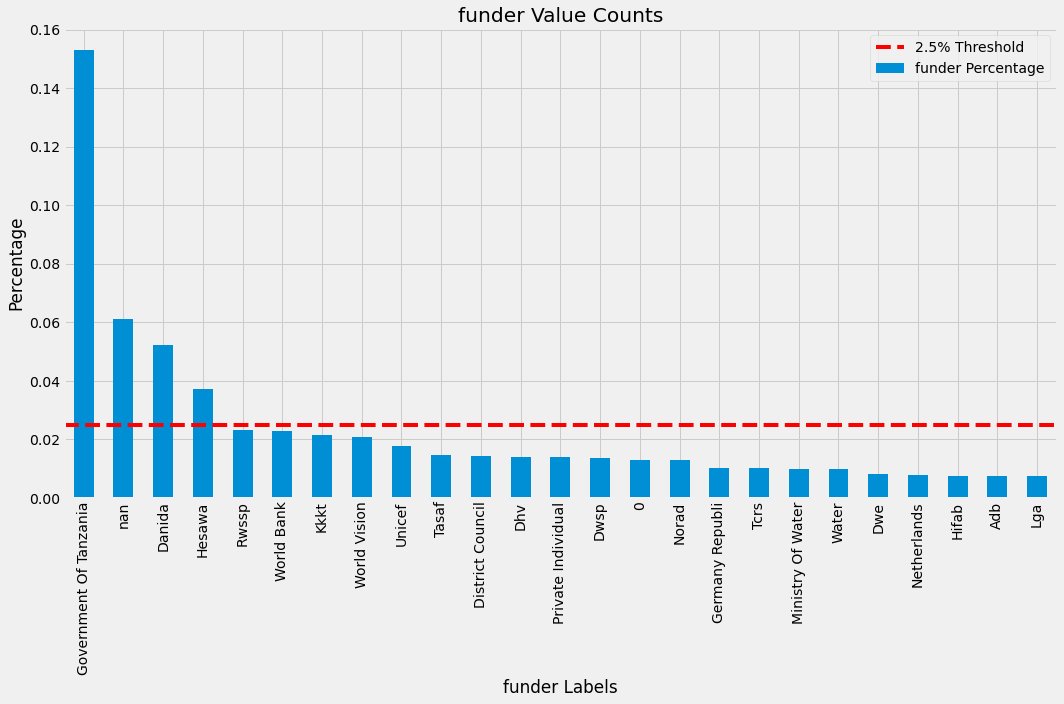

Column Name: installer


Number of unique values: 2143


There are 57247 duplicates


There are 3655 null values


There are 777 zeros


Value Counts Percentage 
 DWE           17400
NaN            3655
Government     1825
RWE            1206
Commu          1060
              ...  
Makala            1
Panone            1
RDWS              1
Ambrose           1
Mahita            1
Name: installer, Length: 2144, dtype: int64




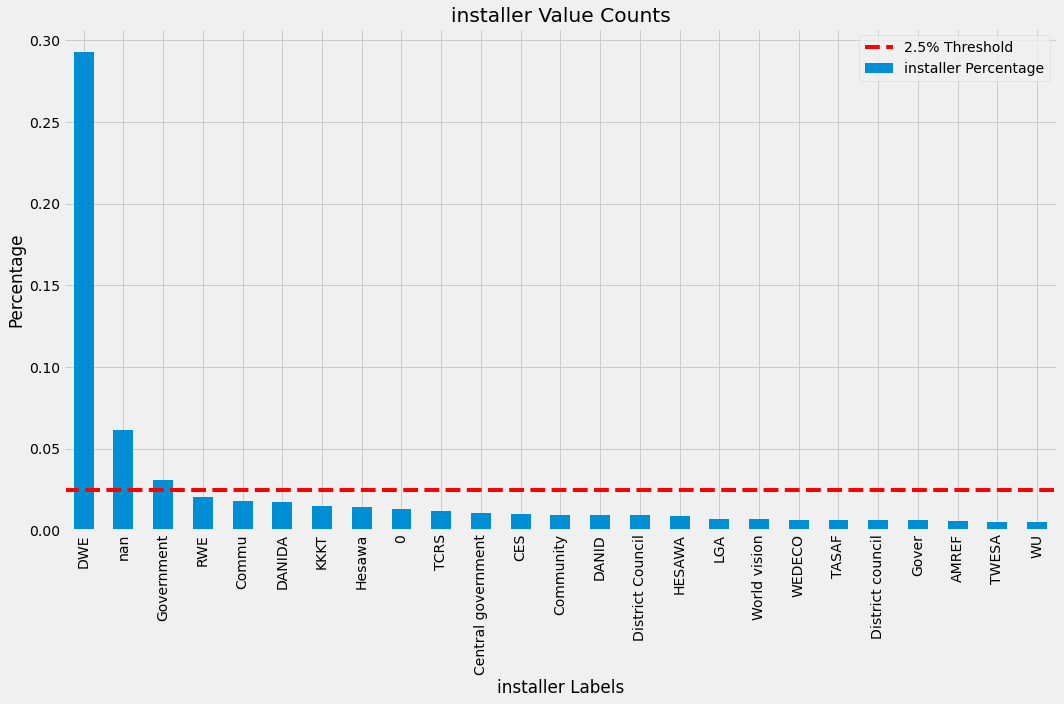

In [1832]:
#eval funder
col_eval(df_clean, cat_col=['funder','installer'])

> **OBSERVATIONS**
> - These 2 columns are not similar but it does have a high cardinality (1897 unique labels) and rare labels.
> - `funder` has 3,635 missing values, which is 6% of the rows while `installer` has 3,655 missing values, which is 6% of the rows. 
> - There is also 777 "0" labels for both which could indicate a missing value.

> **ACTIONS**
> - I will combine both of the 0's with the "Unknown" label
> - I will combine labels in order to eliminate the high cardinality and rare labels.

Column Name: wpt_name


Number of unique values: 37394


There are 21997 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 none             3563
Shuleni          1747
Zahanati          830
Msikitini         535
Kanisani          323
                 ... 
Dina Sipliano       1
Makala              1
Misusura            1
Katuka              1
Kwachulu            1
Name: wpt_name, Length: 37394, dtype: int64




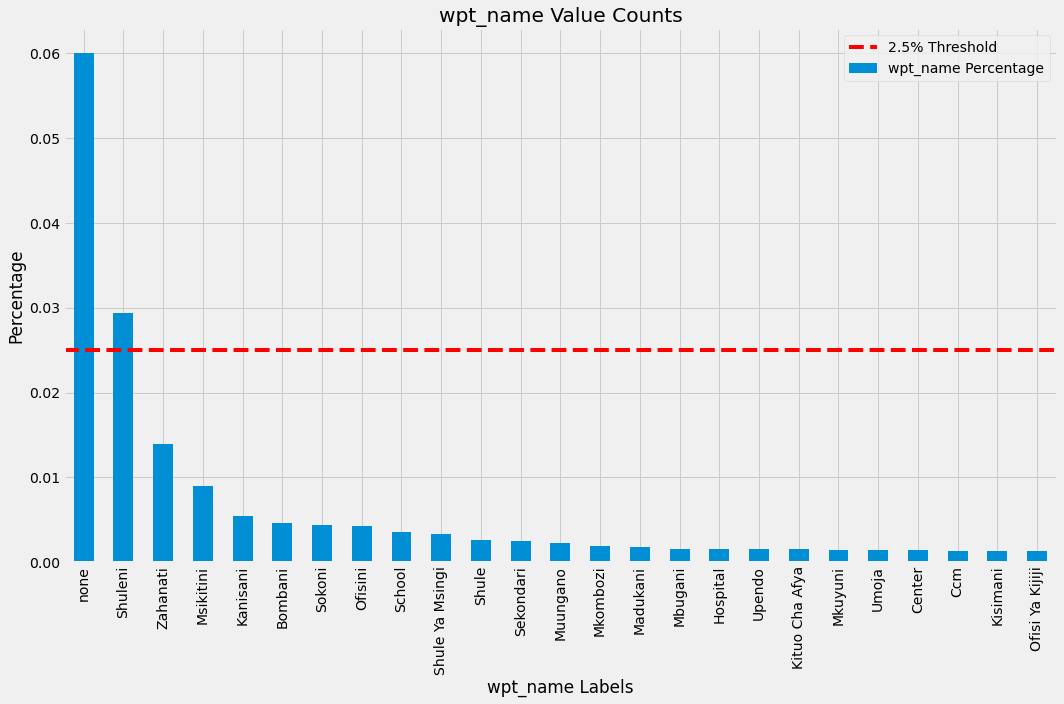

In [1833]:
#eval wpt_name
col_eval(df_clean, cat_col=['wpt_name'])

> **OBSERVATIONS**
> - No issues with `wpt_name`.

Column Name: basin


Number of unique values: 9


There are 59382 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 Lake Victoria              10247
Pangani                     8938
Rufiji                      7973
Internal                    7785
Lake Tanganyika             6431
Wami / Ruvu                 5986
Lake Nyasa                  5085
Ruvuma / Southern Coast     4492
Lake Rukwa                  2454
Name: basin, dtype: int64




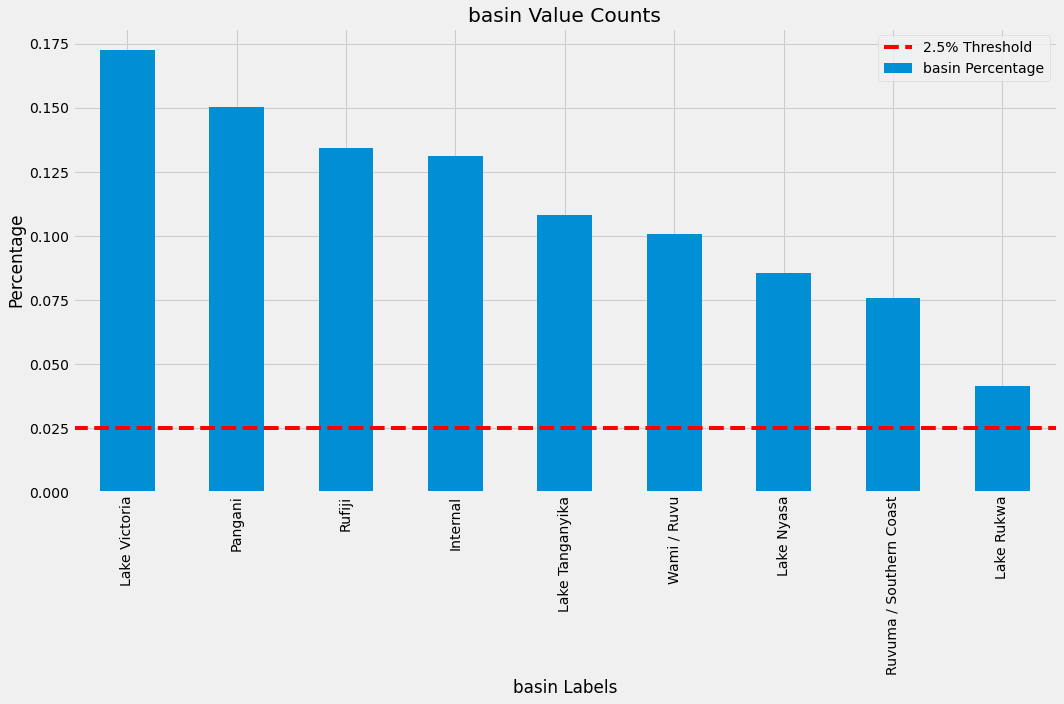

Column Name: subvillage


Number of unique values: 19286


There are 40104 duplicates


There are 371 null values


There are 0 zeros


Value Counts Percentage 
 Madukani        508
Shuleni         506
Majengo         502
Kati            373
NaN             371
               ... 
Kihesa B          1
Chanji A          1
Mangika           1
Nghumbi           1
Ichwankima A      1
Name: subvillage, Length: 19287, dtype: int64




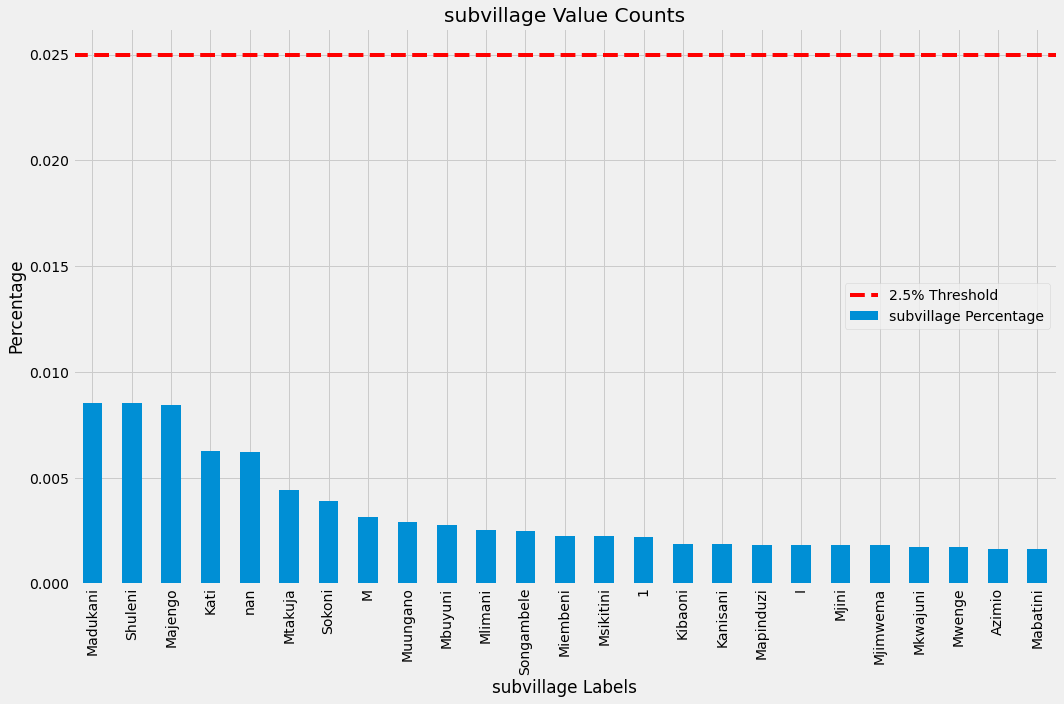

Column Name: region


Number of unique values: 21


There are 59370 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 Iringa           5293
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2632
Tanga            2545
Dodoma           2201
Singida          2093
Mara             1968
Tabora           1959
Rukwa            1807
Mtwara           1729
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64




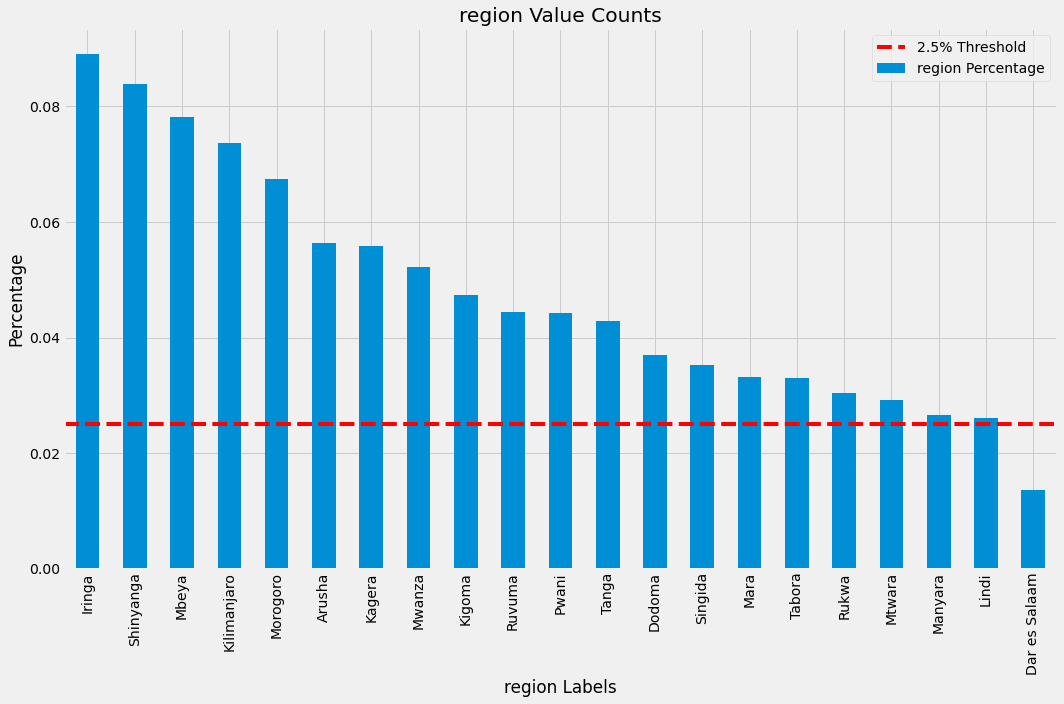

Column Name: region_code


Number of unique values: 27


There are 59364 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 11    5299
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2511
1     2201
13    2093
14    1979
20    1968
15    1807
6     1608
21    1583
80    1238
60    1023
90     916
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64




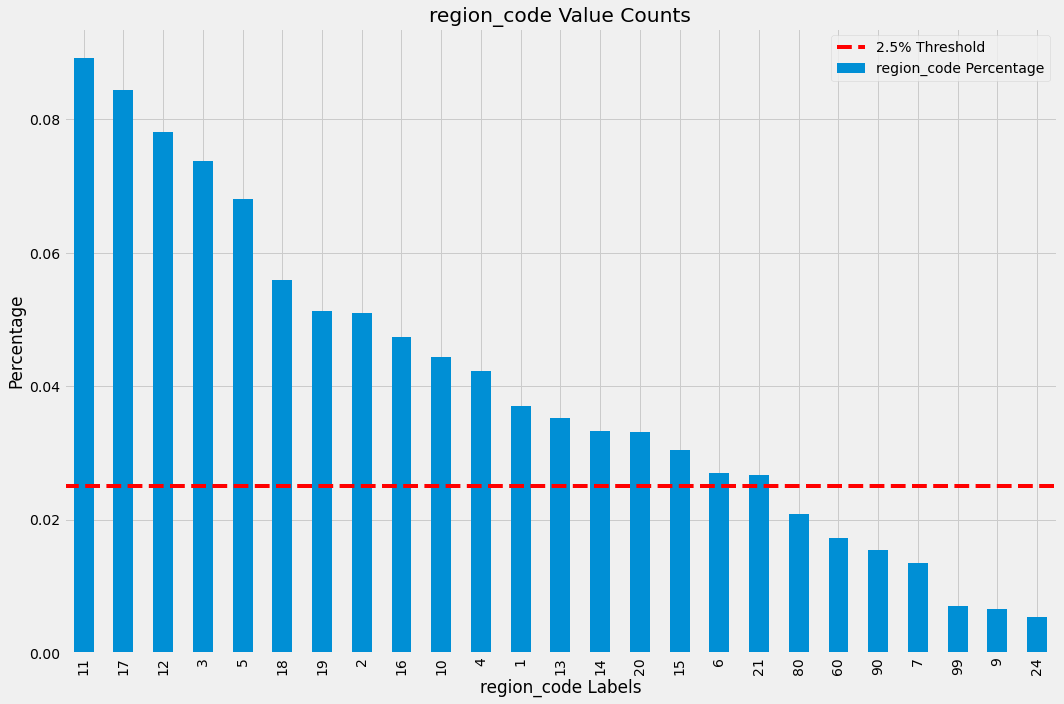

Column Name: district_code


Number of unique values: 20


There are 59371 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 1     12203
2     11171
3      9998
4      8995
5      4356
6      4074
7      3343
8      1043
30      995
33      871
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64




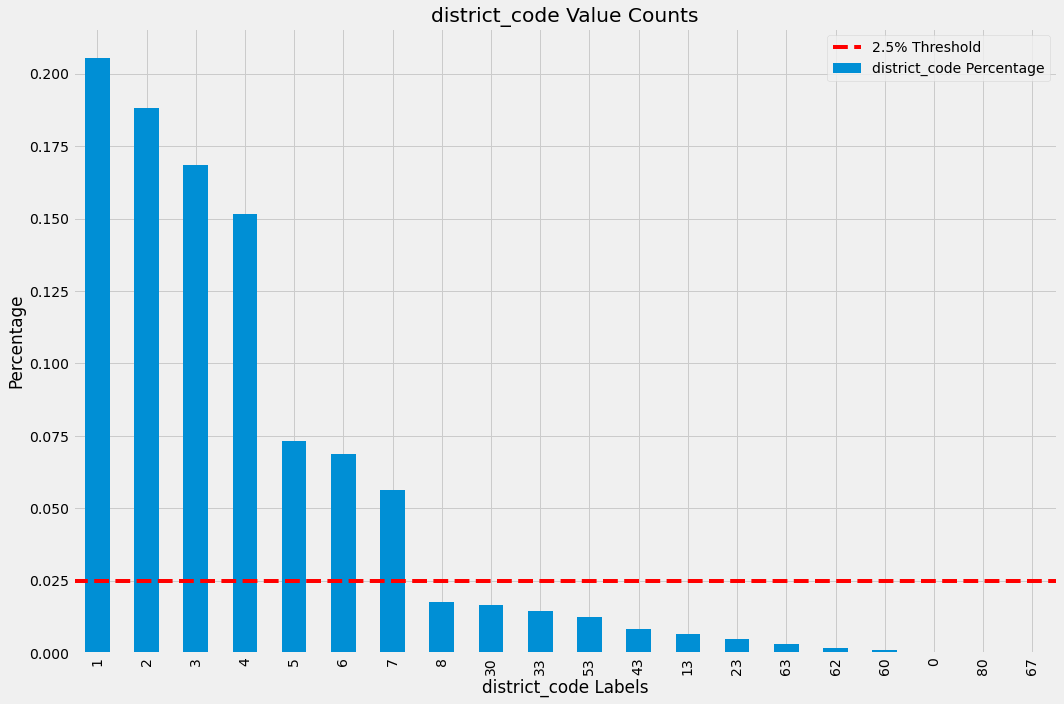

Column Name: lga


Number of unique values: 125


There are 59266 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 Njombe          2502
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64




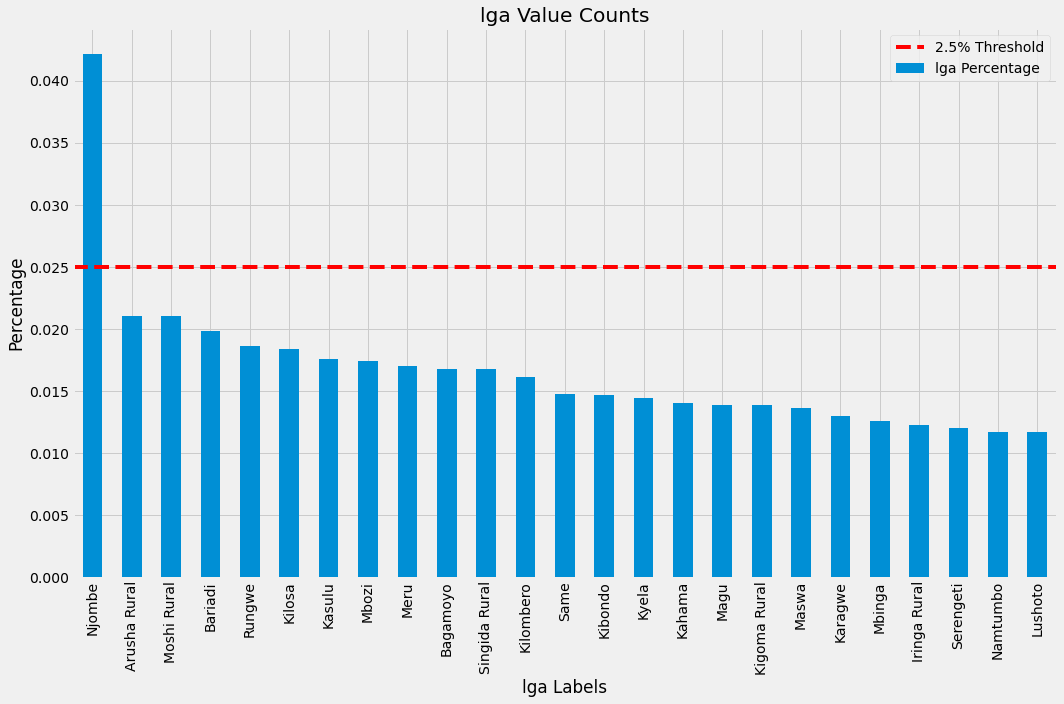

Column Name: ward


Number of unique values: 2092


There are 57299 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Mkumbi                1
Nyamtinga             1
Korongoni             1
Mwanga Kaskazini      1
Burungura             1
Name: ward, Length: 2092, dtype: int64




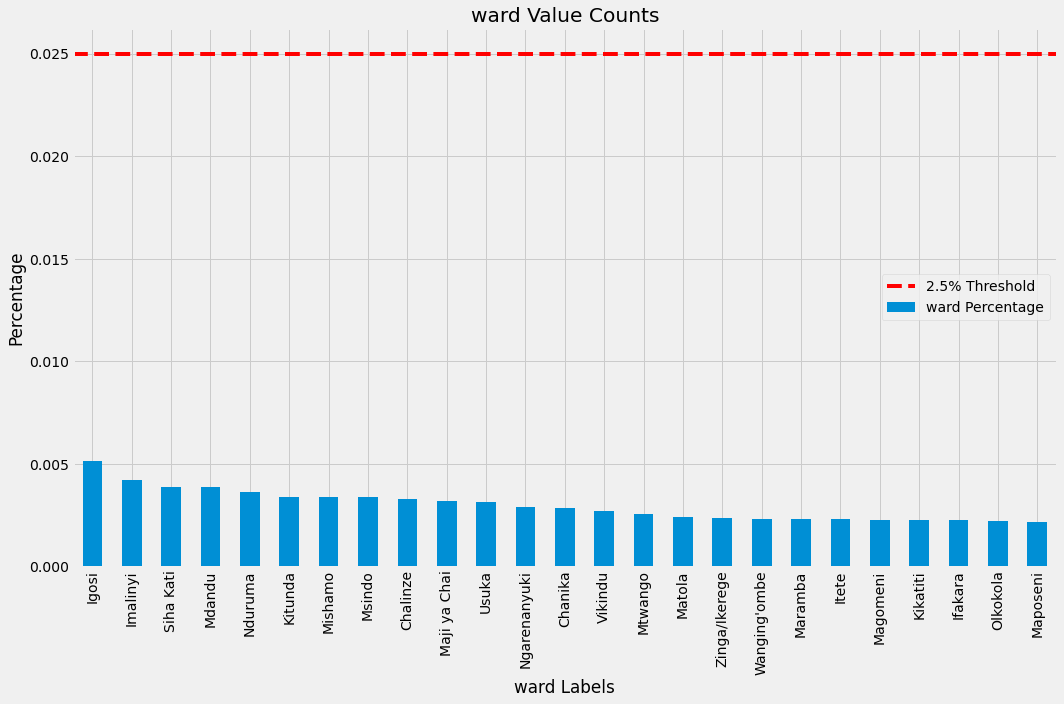

In [1834]:
#eval geographic features
col_eval(df_clean, cat_col=['basin','subvillage','region','region_code','district_code','lga','ward'])

> **OBSERVATIONS**
> - `basin` seems normal
> - `subvillage` has 371 null values and high cardinality (19,286 unique values)
> - `region` seems normal
> - `region_code` is redundant 
> - `district_code` seems normal
> - `lga` seems normal
> - `ward` has high cardinality (2,092 unique values)

> **ACTIONS**
> - impute `subvillage` and consolidate rare labels
> - drop `region_code`

Column Name: public_meeting


Number of unique values: 2


There are 59388 duplicates


There are 3333 null values


There are 0 zeros


Value Counts Percentage 
 True     51003
False     5055
NaN       3333
Name: public_meeting, dtype: int64




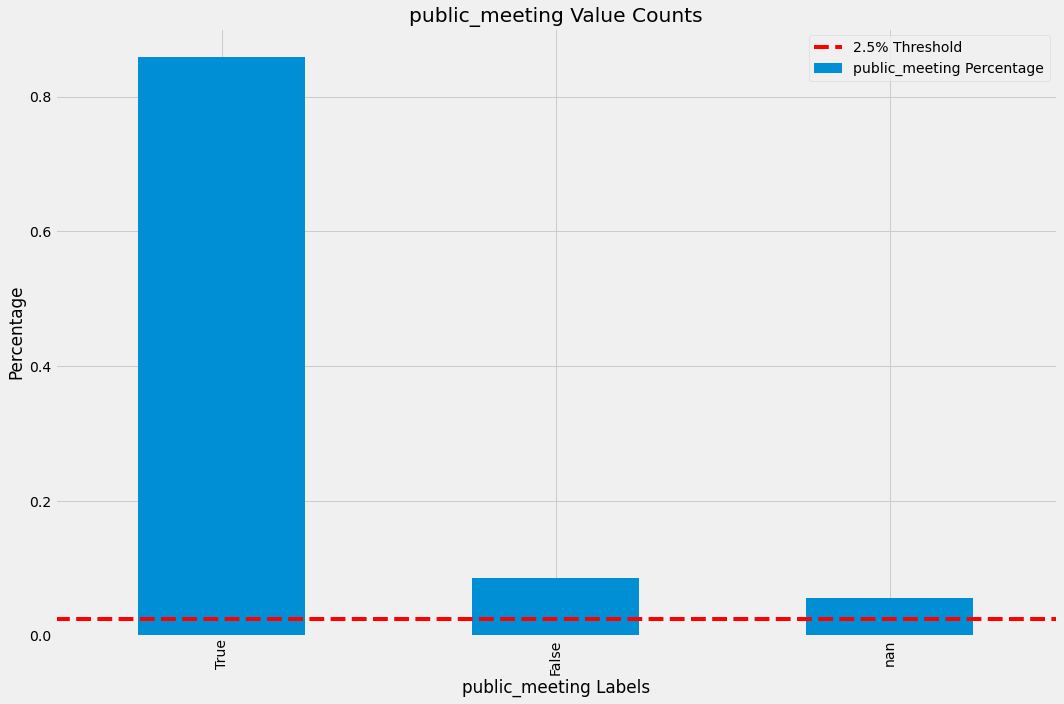

In [1835]:
#eval public_meeting
col_eval(df_clean, cat_col=['public_meeting'])

> **OBSERVATIONS**
> - `public_meeting` looks to be a boolean feature
> - there are 3,333 missing values

> **ACTIONS**
> - convert to string
> - impute missing values as "unknown"

Column Name: recorded_by


Number of unique values: 1


There are 59390 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 GeoData Consultants Ltd    59391
Name: recorded_by, dtype: int64




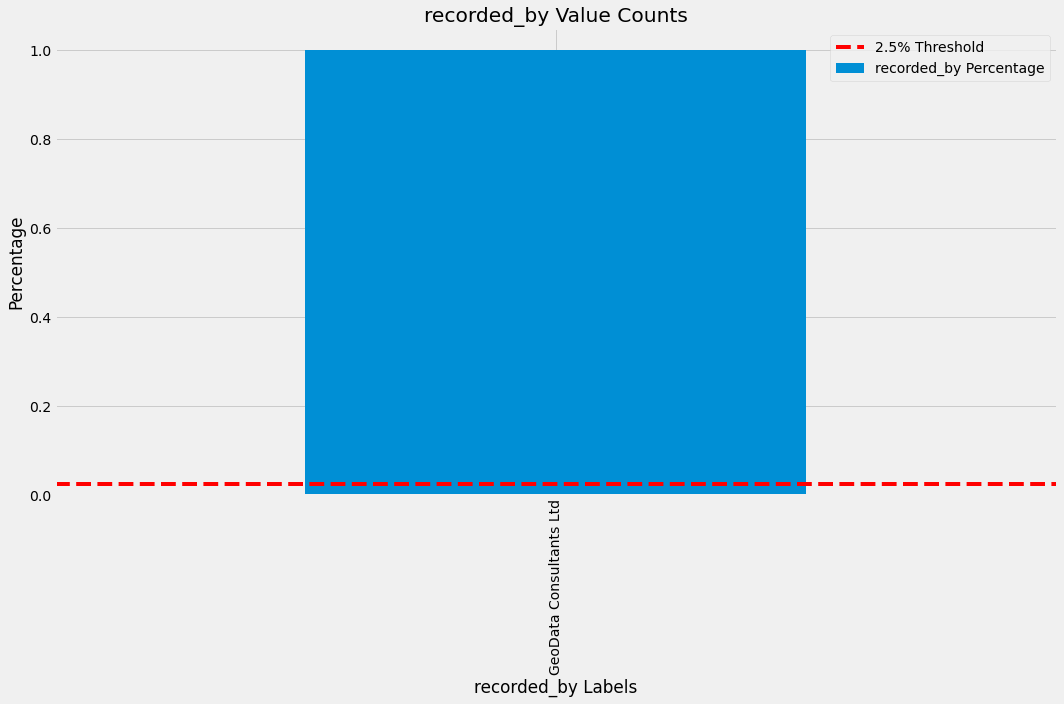

In [1836]:
#eval recorded_by
col_eval(df_clean, cat_col=['recorded_by'])

> **OBSERVATIONS**
> - `recorded_by` has a single value and will not be beneficial for EDA or modeling

> **ACTIONS**
> - drop the feature

Column Name: scheme_management


Number of unique values: 12


There are 59378 duplicates


There are 3877 null values


There are 0 zeros


Value Counts Percentage 
 VWC                 36786
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1062
Company              1061
Other                 765
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64




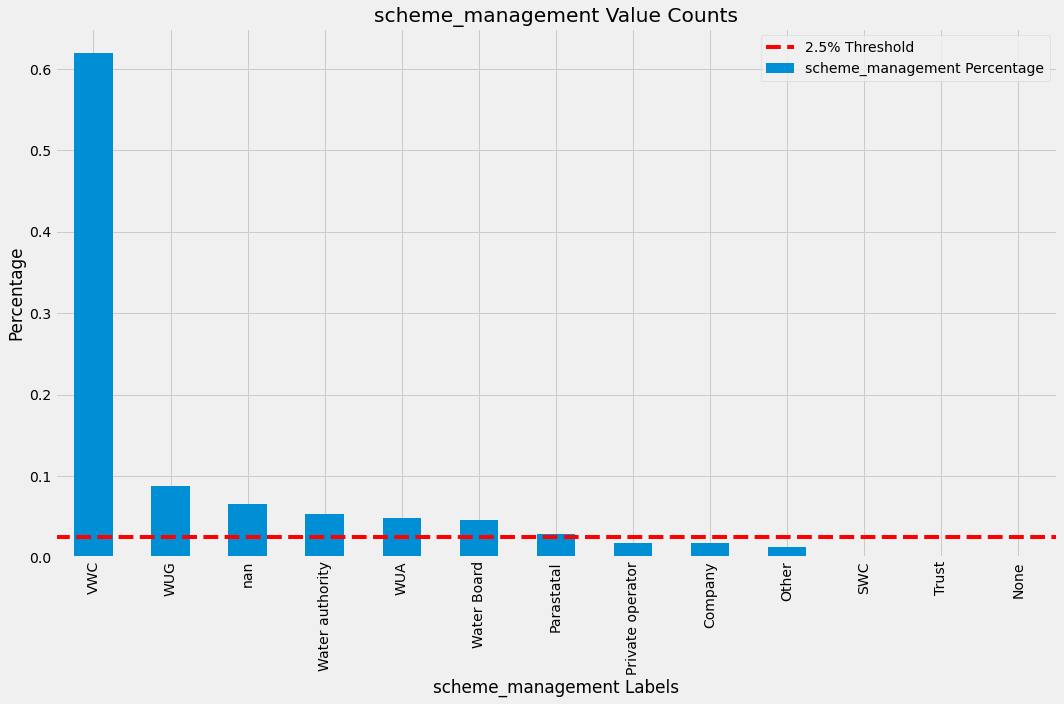

Column Name: scheme_name


Number of unique values: 2696


There are 56694 duplicates


There are 28160 null values


There are 0 zeros


Value Counts Percentage 
 NaN                          28160
K                              682
None                           644
Borehole                       545
Chalinze wate                  405
                             ...  
Ujindali                         1
Ijndila                          1
Nahukahuka Primary School        1
Pongwe Water Supply              1
Nyakabila  spring source         1
Name: scheme_name, Length: 2697, dtype: int64




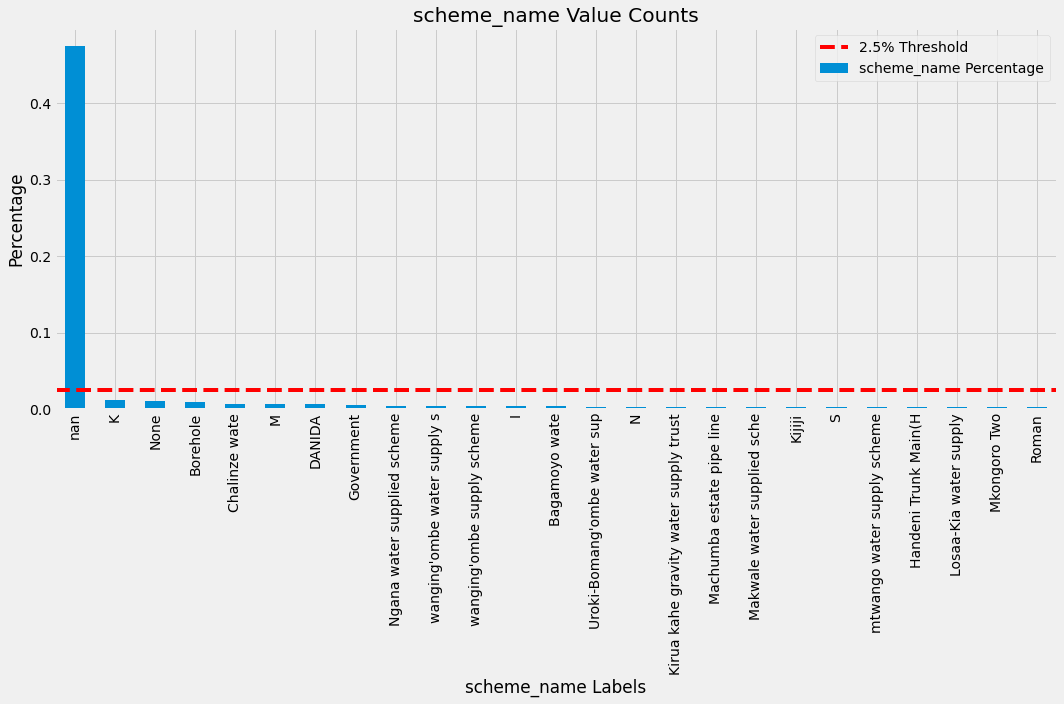

In [1837]:
#eval scheme_name, scheme_management
col_eval(df_clean, cat_col=['scheme_management','scheme_name'])

> **OBSERVATIONS**
> - `scheme_management` has 3,877 missing values
> - `scheme_name` has 28,160 missing values

> **ACTIONS**
> - consolidate the null values with "Unknown" for both features

Column Name: permit


Number of unique values: 2


There are 59388 duplicates


There are 3056 null values


There are 0 zeros


Value Counts Percentage 
 True     38849
False    17486
NaN       3056
Name: permit, dtype: int64




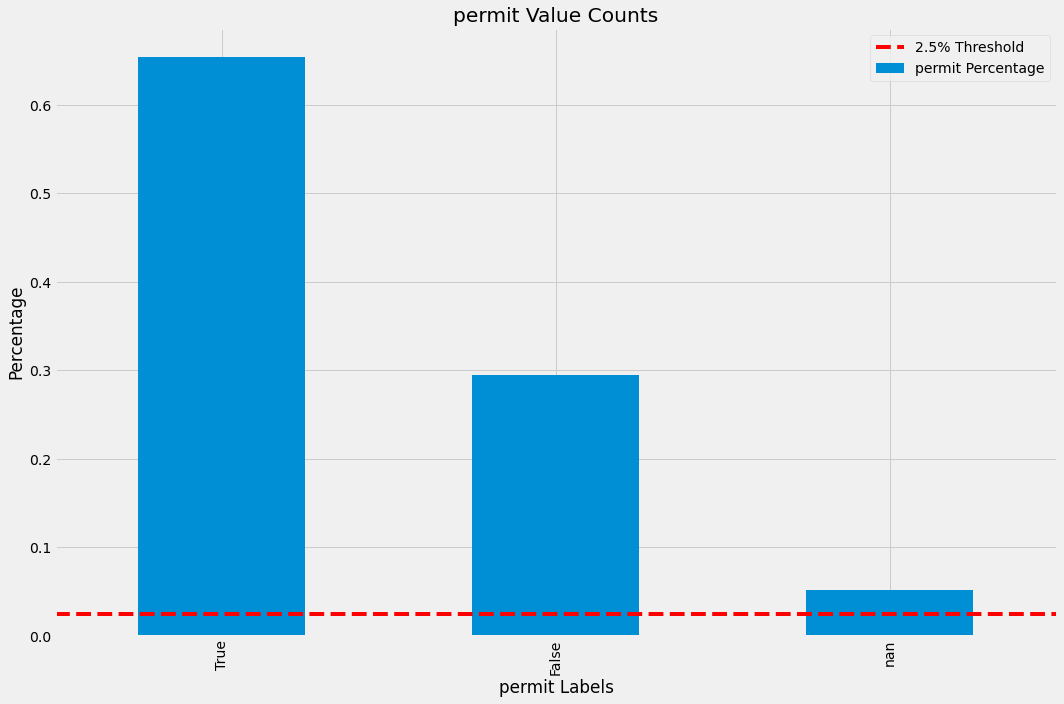

In [1838]:
#eval permit
col_eval(df_clean, cat_col=['permit'])

> **OBSERVATIONS**
> - `permit` looks like a boolean feature
> - There are 3056 original missing values which were converted to string 'nan', which is 5% of the rows.

> **ACTIONS**
> - I will rename these "unknown"
> - I will also recast as a string

Column Name: extraction_type_class


Number of unique values: 7


There are 59384 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 gravity         26777
handpump        16452
other            6429
submersible      6179
motorpump        2987
rope pump         450
wind-powered      117
Name: extraction_type_class, dtype: int64




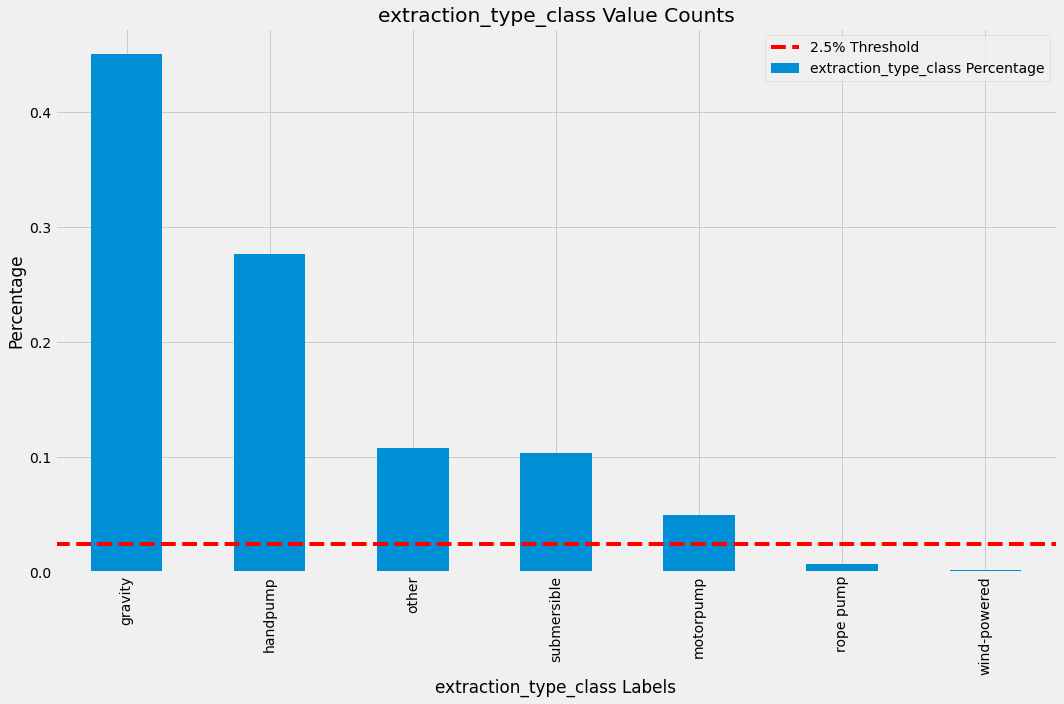

Column Name: extraction_type_group


Number of unique values: 13


There are 59378 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 gravity            26777
nira/tanira         8153
other               6429
submersible         6179
swn 80              3669
mono                2865
india mark ii       2399
afridev             1770
rope pump            450
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        97
Name: extraction_type_group, dtype: int64




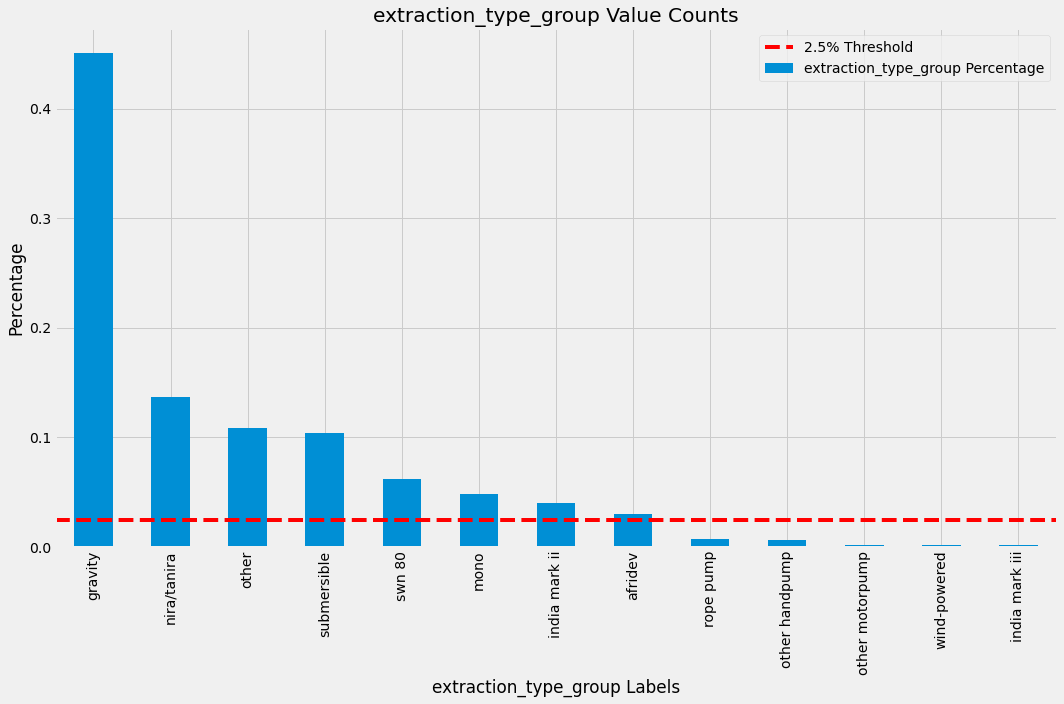

Column Name: extraction_type


Number of unique values: 18


There are 59373 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 gravity                      26777
nira/tanira                   8153
other                         6429
submersible                   4764
swn 80                        3669
mono                          2865
india mark ii                 2399
afridev                       1770
ksb                           1415
other - rope pump              450
other - swn 81                 229
windmill                       117
india mark iii                  97
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64




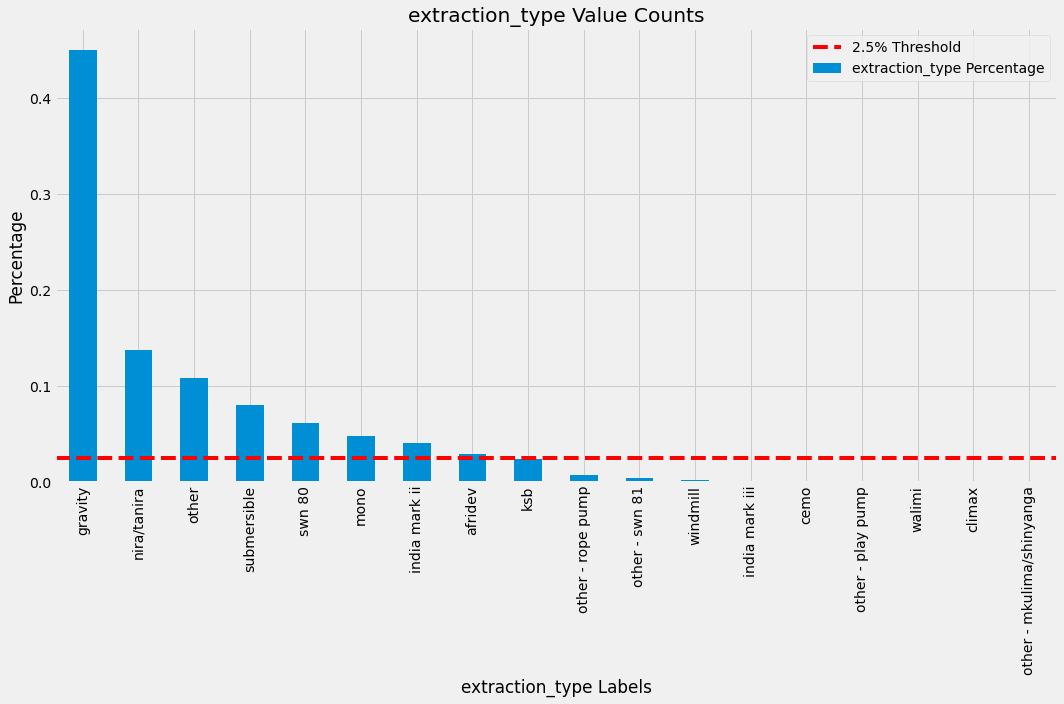

In [1839]:
#eval extraction_type, extraction_type_group, extraction_type_class
col_eval(df_clean, cat_col=['extraction_type_class','extraction_type_group','extraction_type'])

In [1840]:
#eval extraction_type_class, extraction_type_group and extraction_type
df_clean.groupby(by=['extraction_type_class','extraction_type_group','extraction_type']).count()

id  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                    26777   
handpump              afridev               afridev                     1770   
                      india mark ii         india mark ii               2399   
                      india mark iii        india mark iii                97   
                      nira/tanira           nira/tanira                 8153   
                      other handpump        other - mkulima/shinyanga      2   
                                            other - play pump             85   
                                            other - swn 81               229   
                                            walimi                        48   
                      swn 80                swn 80                      3669   
motorpump             mono                  mono                        2865   
                      other motorpump       cemo                          90   
                                            climax                        32   
other                 other                 other                       6429   
rope pump             rope pump             other - rope pump            450   
submersible           submersible           ksb                         1415   
                                            submersible                 4764   
wind-powered          wind-powered          windmill                     117   

                                                                        head  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                    26777   
handpump              afridev               afridev                     1770   
                      india mark ii         india mark ii               2399   
                      india mark iii        india mark iii                97   
                      nira/tanira           nira/tanira                 8153   
                      other handpump        other - mkulima/shinyanga      2   
                                            other - play pump             85   
                                            other - swn 81               229   
                                            walimi                        48   
                      swn 80                swn 80                      3669   
motorpump             mono                  mono                        2865   
                      other motorpump       cemo                          90   
                                            climax                        32   
other                 other                 other                       6429   
rope pump             rope pump             other - rope pump            450   
submersible           submersible           ksb                         1415   
                                            submersible                 4764   
wind-powered          wind-powered          windmill                     117   

                                                                       funder  \
extraction_type_class extraction_type_group extraction_type                     
gravity               gravity               gravity                     24701   
handpump              afridev               afridev                      1668   
                      india mark ii         india mark ii                2357   
                      india mark iii        india mark iii                 97   
                      nira/tanira           nira/tanira                  7898   
                      other handpump        other - mkulima/shinyanga       1   
                                            other - play pump              85   
                                            other - swn 81                219   
                                            walimi            

> **OBSERVATIONS**
> - These columns are similar as they represent a hierarchical structure.

> **ACTIONS**
> - I will consolidate by removing the `extraction_type_group` feature as the labels are captured in more detail in the `extraction_type` feature. I will rename the columns and will also clean up the naming of the labels.

Column Name: management


Number of unique values: 12


There are 59379 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 vwc                 40500
wug                  6515
water board          2933
wua                  2535
private operator     1970
parastatal           1768
water authority       904
other                 843
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64




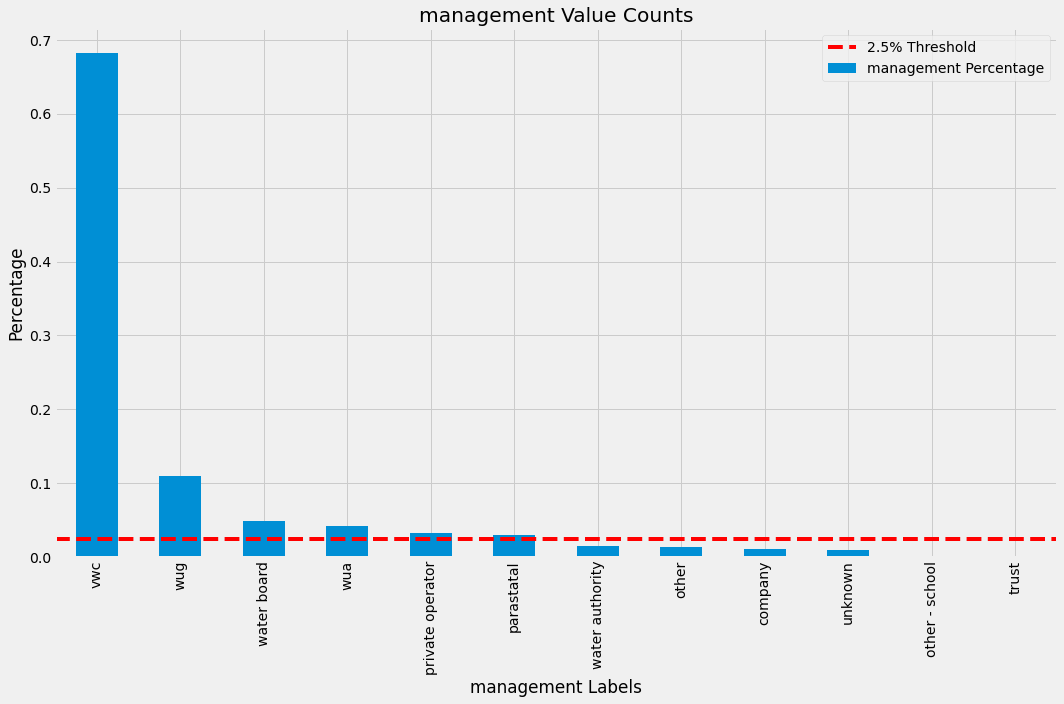

Column Name: management_group


Number of unique values: 5


There are 59386 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 user-group    52483
commercial     3637
parastatal     1768
other           942
unknown         561
Name: management_group, dtype: int64




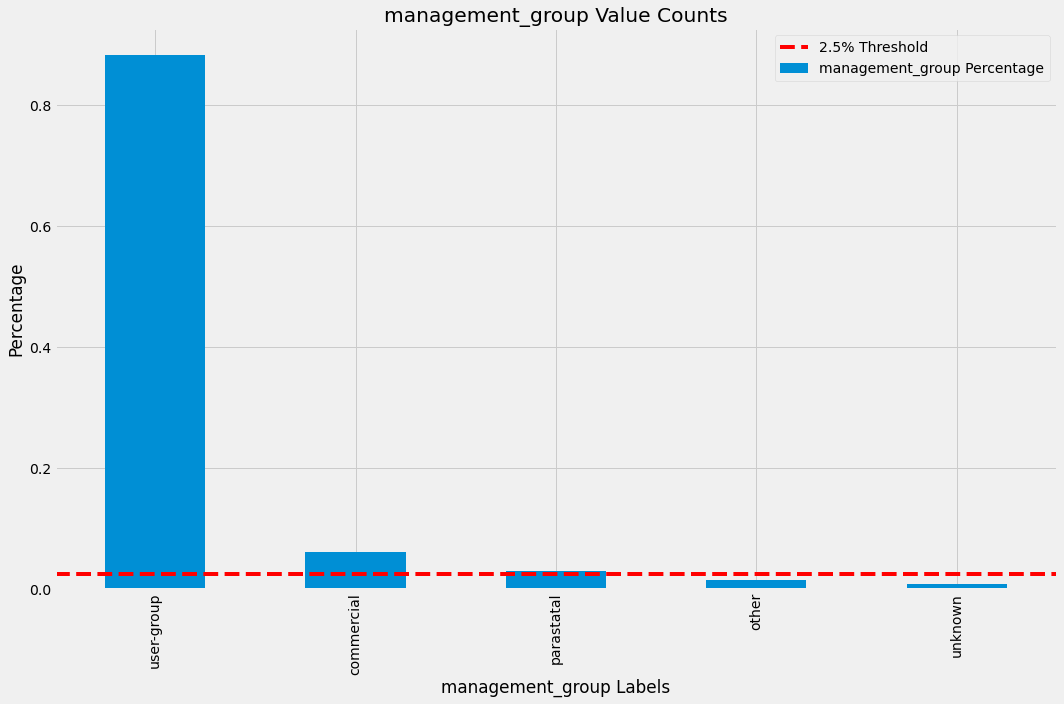

In [1841]:
#evaluate management and management_group for dropping
col_eval(df_clean, cat_col=['management','management_group'])

In [1842]:
#evaluate management and management_group for dropping
df_clean.groupby(by=['management','management_group']).count().index

MultiIndex([(         'company', 'commercial'),
            (           'other',      'other'),
            (  'other - school',      'other'),
            (      'parastatal', 'parastatal'),
            ('private operator', 'commercial'),
            (           'trust', 'commercial'),
            (         'unknown',    'unknown'),
            (             'vwc', 'user-group'),
            ( 'water authority', 'commercial'),
            (     'water board', 'user-group'),
            (             'wua', 'user-group'),
            (             'wug', 'user-group')],
           names=['management', 'management_group'])

> **OBSERVATIONS**
> - `management_group` is redundant

> **ACTIONS**
> - drop `management_group`

Column Name: payment


Number of unique values: 7


There are 59384 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 never pay                25343
pay per bucket            8982
pay monthly               8300
unknown                   8157
pay when scheme fails     3913
pay annually              3642
other                     1054
Name: payment, dtype: int64




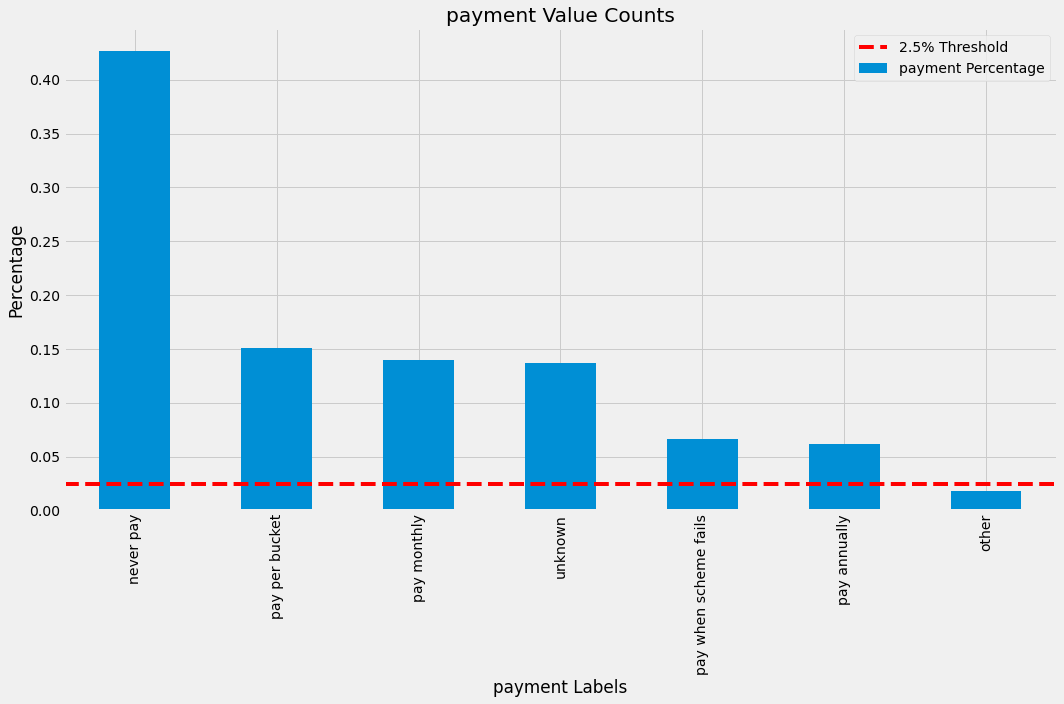

Column Name: payment_type


Number of unique values: 7


There are 59384 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 never pay     25343
per bucket     8982
monthly        8300
unknown        8157
on failure     3913
annually       3642
other          1054
Name: payment_type, dtype: int64




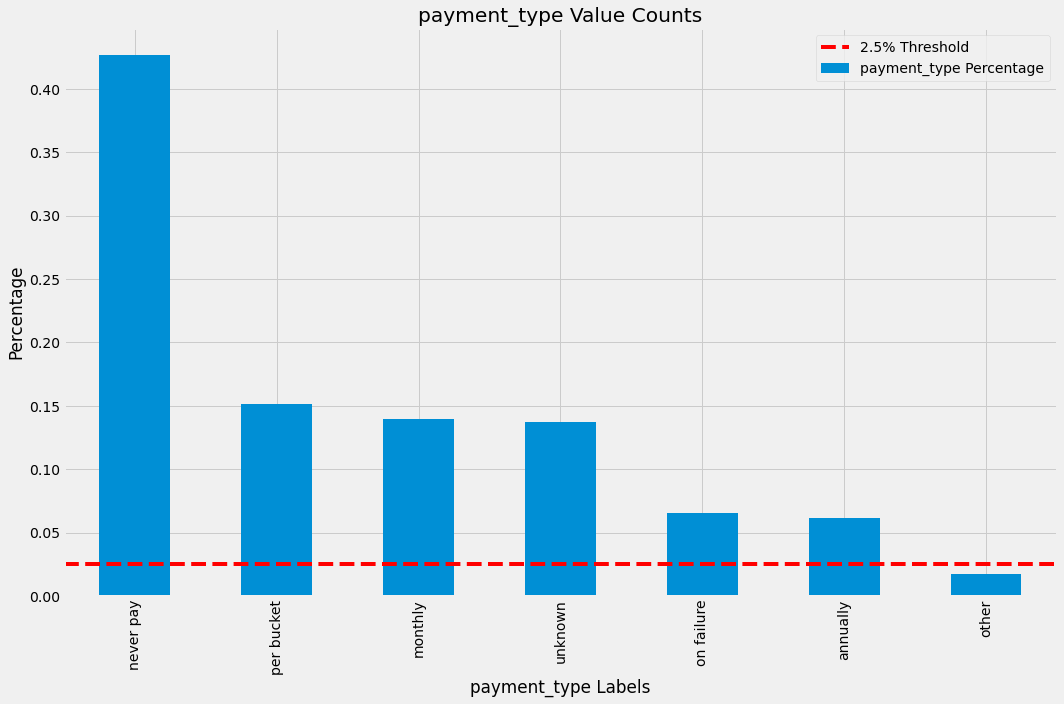

In [1843]:
#evaluate payment, payment_type
col_eval(df_clean, cat_col=['payment','payment_type'])

In [1844]:
#evaluate payment and payment_type
df_clean.groupby(by=['payment','payment_type']).count().index

MultiIndex([(            'never pay',  'never pay'),
            (                'other',      'other'),
            (         'pay annually',   'annually'),
            (          'pay monthly',    'monthly'),
            (       'pay per bucket', 'per bucket'),
            ('pay when scheme fails', 'on failure'),
            (              'unknown',    'unknown')],
           names=['payment', 'payment_type'])

> **OBSERVATIONS**
> - `payment_type` is redundant

> **ACTIONS**
> - drop `payment_type`

Column Name: water_quality


Number of unique values: 8


There are 59383 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 soft                  50810
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         338
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64




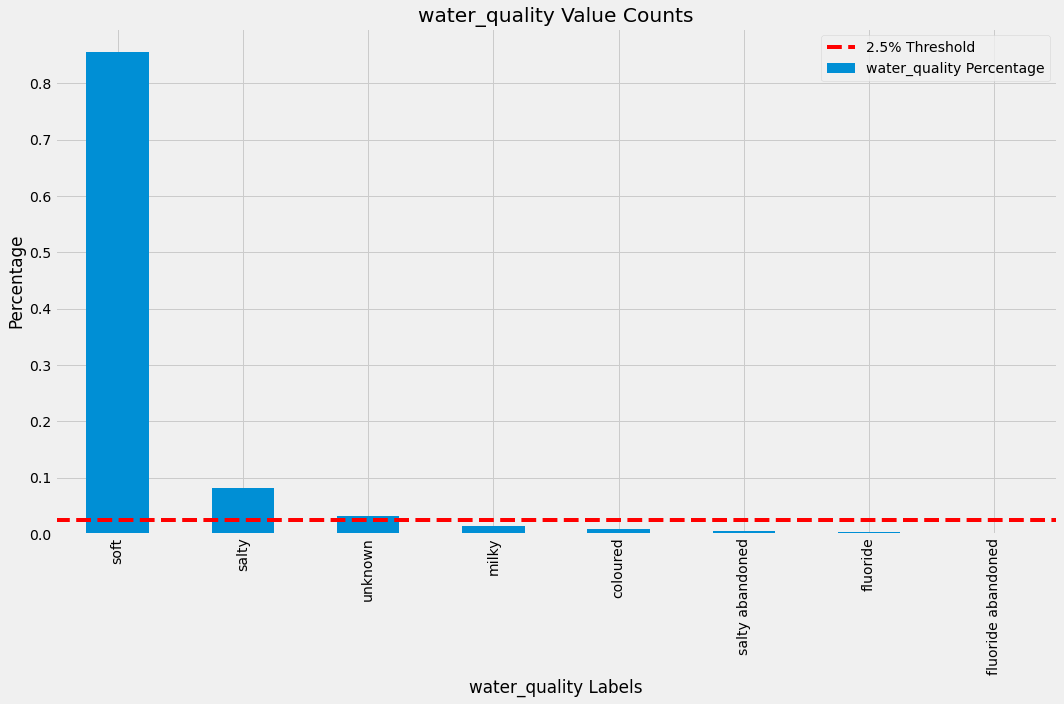

Column Name: quality_group


Number of unique values: 6


There are 59385 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 good        50810
salty        5194
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64




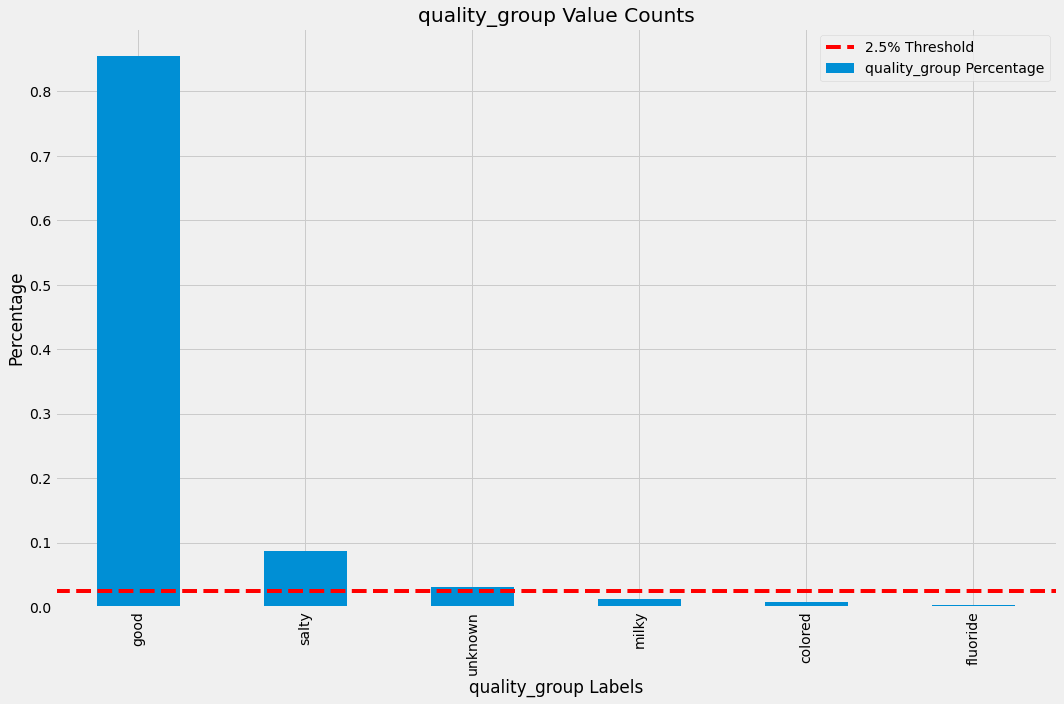

In [1845]:
#eval water_quality and quality_group for dropping
col_eval(df_clean,cat_col=['water_quality','quality_group'])

In [1846]:
#eval water_quality and quality_group
df_clean.groupby(by=['water_quality','quality_group']).count().index

MultiIndex([(          'coloured',  'colored'),
            (          'fluoride', 'fluoride'),
            ('fluoride abandoned', 'fluoride'),
            (             'milky',    'milky'),
            (             'salty',    'salty'),
            (   'salty abandoned',    'salty'),
            (              'soft',     'good'),
            (           'unknown',  'unknown')],
           names=['water_quality', 'quality_group'])

> **OBSERVATIONS**
> - `quality_group` is redundant, need to update "soft" label to "soft-good".

> **ACTIONS**
> - drop `quality_group`, update "soft" label to "soft-good" on `water_quality` feature

Column Name: quantity


Number of unique values: 5


There are 59386 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 enough          33181
insufficient    15129
dry              6243
seasonal         4049
unknown           789
Name: quantity, dtype: int64




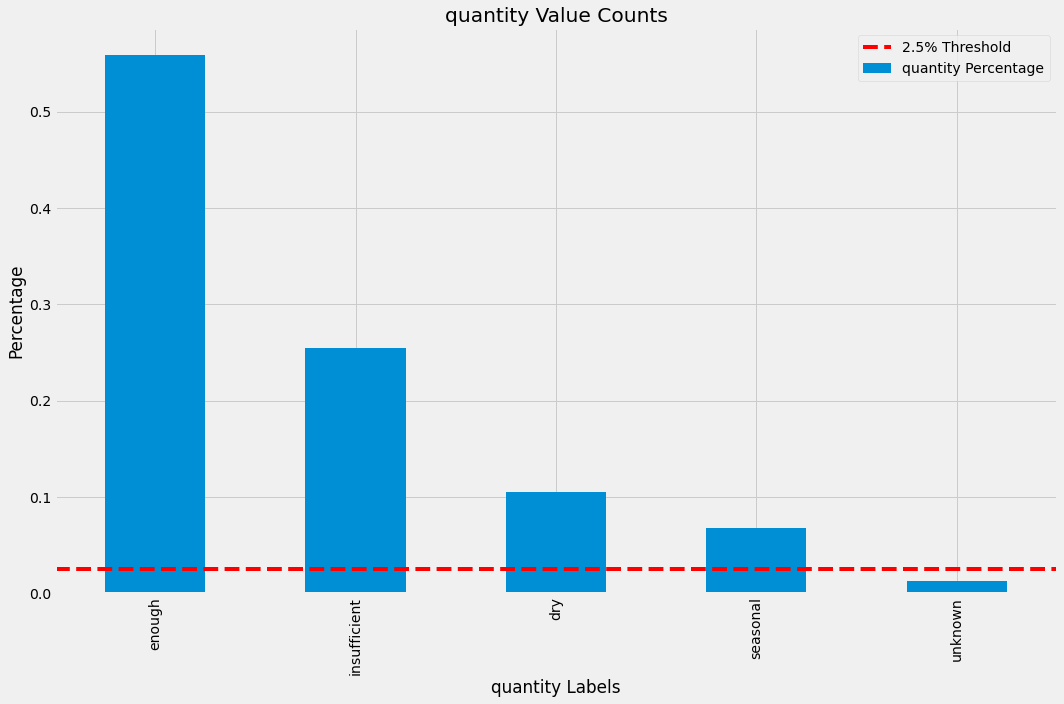

Column Name: quantity_group


Number of unique values: 5


There are 59386 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 enough          33181
insufficient    15129
dry              6243
seasonal         4049
unknown           789
Name: quantity_group, dtype: int64




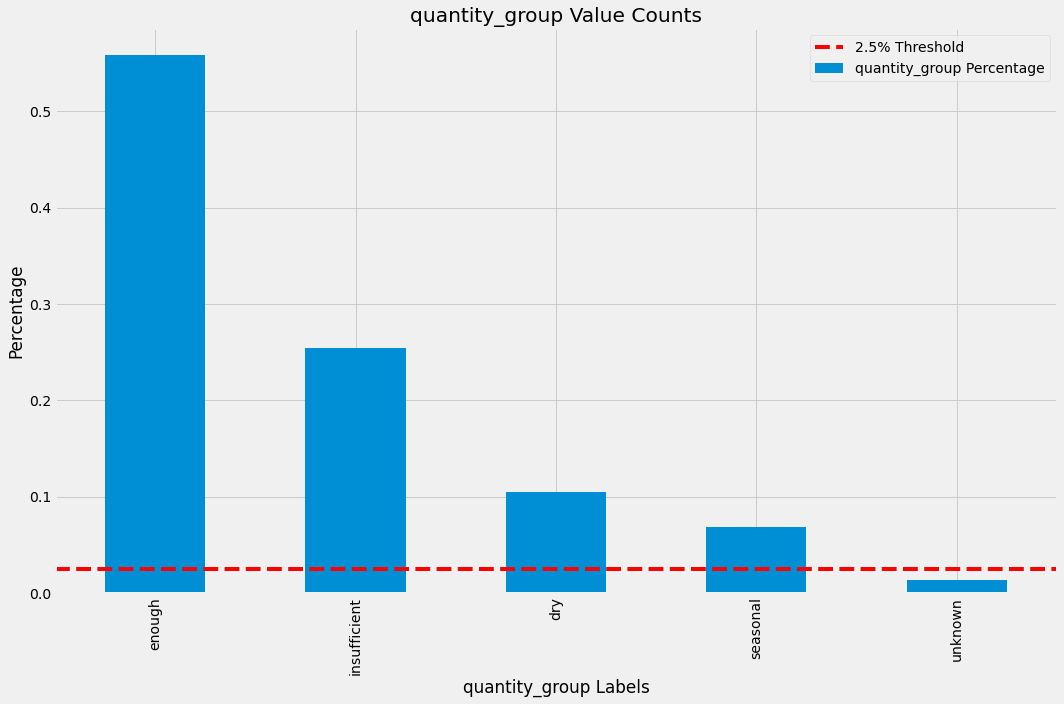

In [1847]:
#evaluate quantity and quantity group
col_eval(df_clean, cat_col=['quantity','quantity_group'])

In [1848]:
#eval quantity and quantity_group
df_clean.groupby(by=['quantity','quantity_group']).count().index

MultiIndex([(         'dry',          'dry'),
            (      'enough',       'enough'),
            ('insufficient', 'insufficient'),
            (    'seasonal',     'seasonal'),
            (     'unknown',      'unknown')],
           names=['quantity', 'quantity_group'])

> **OBSERVATIONS**
> - `quantity` and `quantity_group` are the same. 

> **ACTIONS**
> - I will drop `quantity_group`

Column Name: source


Number of unique values: 10


There are 59381 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 spring                  17018
shallow well            16820
machine dbh             11075
river                    9612
rainwater harvesting     2294
hand dtw                  873
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64




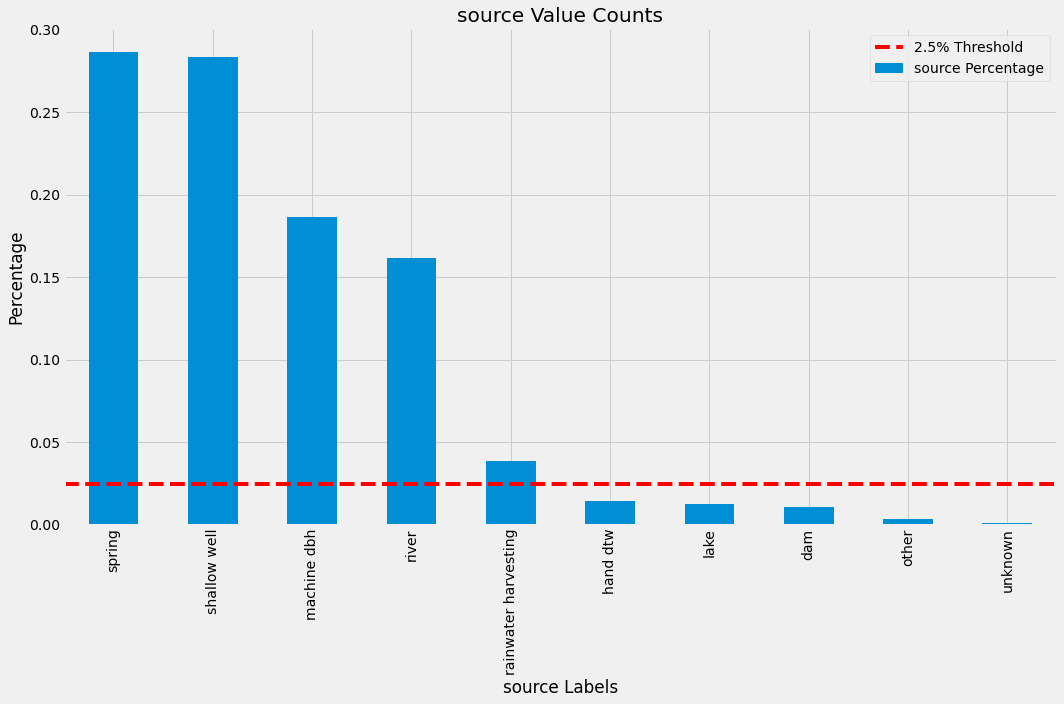

Column Name: source_type


Number of unique values: 7


There are 59384 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 spring                  17018
shallow well            16820
borehole                11948
river/lake              10377
rainwater harvesting     2294
dam                       656
other                     278
Name: source_type, dtype: int64




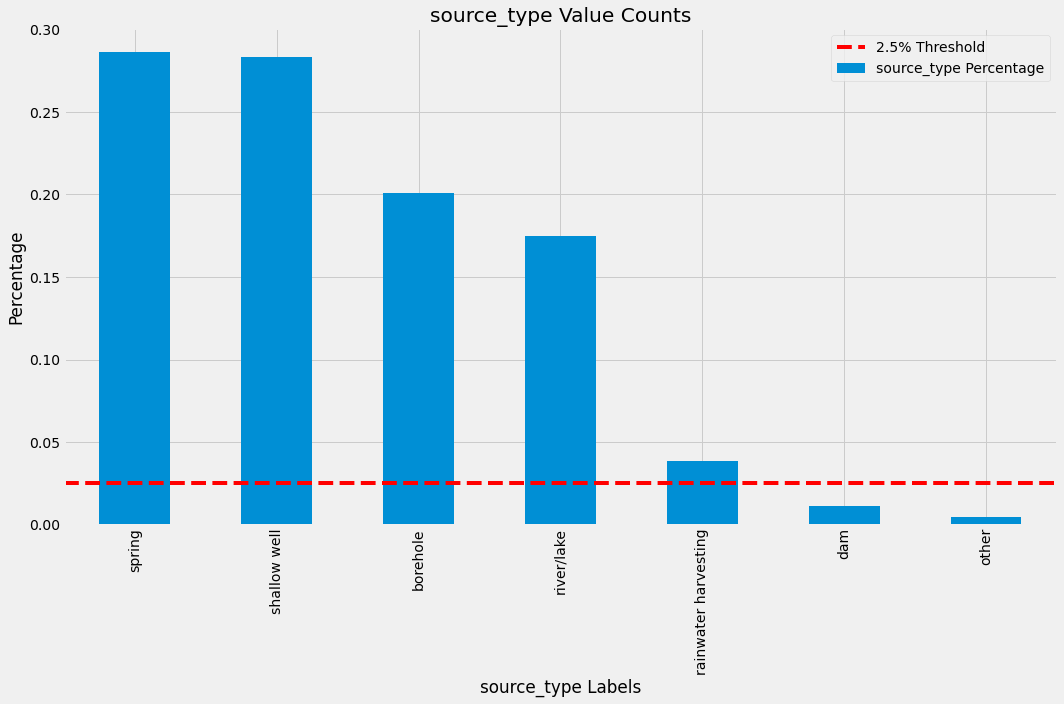

Column Name: source_class


Number of unique values: 3


There are 59388 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 groundwater    45786
surface        13327
unknown          278
Name: source_class, dtype: int64




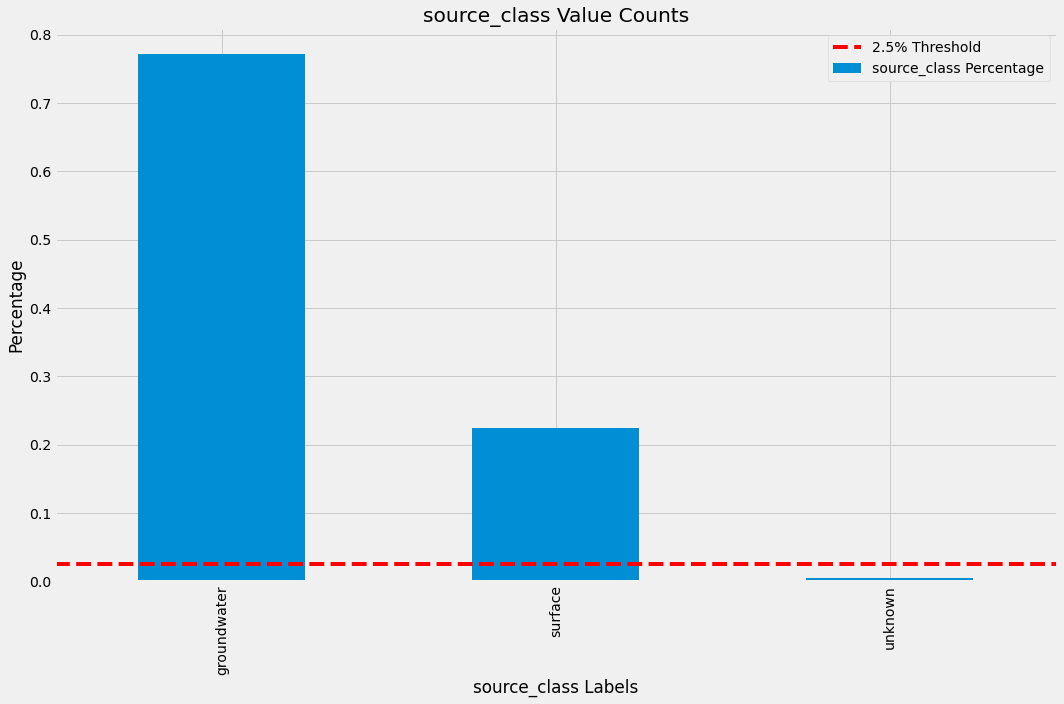

In [1849]:
#evaluate the source, source_type, source_class features
col_eval(df_clean, cat_col=['source','source_type','source_class'])

In [1850]:
#groupby to see redundancy
df_clean.groupby(by=['source_class','source_type','source']).count().index

MultiIndex([('groundwater',             'borehole',             'hand dtw'),
            ('groundwater',             'borehole',          'machine dbh'),
            ('groundwater',         'shallow well',         'shallow well'),
            ('groundwater',               'spring',               'spring'),
            (    'surface',                  'dam',                  'dam'),
            (    'surface', 'rainwater harvesting', 'rainwater harvesting'),
            (    'surface',           'river/lake',                 'lake'),
            (    'surface',           'river/lake',                'river'),
            (    'unknown',                'other',                'other'),
            (    'unknown',                'other',              'unknown')],
           names=['source_class', 'source_type', 'source'])

> **OBSERVATIONS**
> - `source_type` is redundant information

> **ACTIONS**
> - I will remove `source_type` and rename `source_class` as `source_type_1` and `source` as `source_type_2`

Column Name: waterpoint_type


Number of unique values: 7


There are 59384 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 communal standpipe             28520
hand pump                      17483
other                           6379
communal standpipe multiple     6102
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64




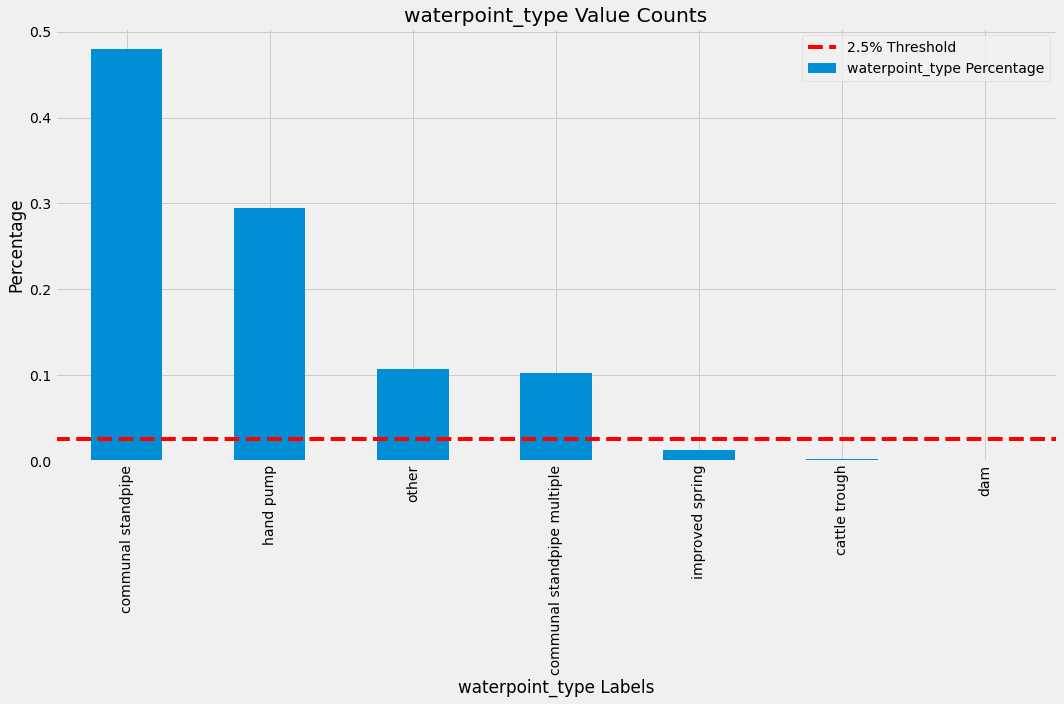

Column Name: waterpoint_type_group


Number of unique values: 6


There are 59385 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 communal standpipe    34622
hand pump             17483
other                  6379
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64




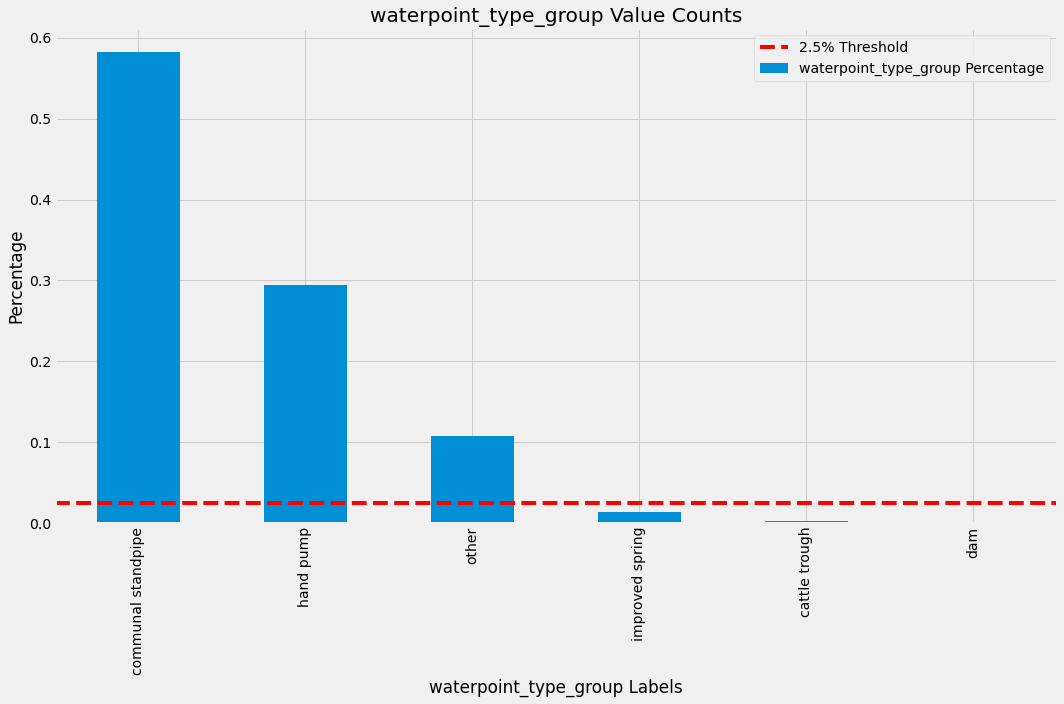

In [1851]:
#evaluation waterpoint_type and waterpoint_type_group
col_eval(df_clean, cat_col=['waterpoint_type','waterpoint_type_group'])

In [1852]:
#groupby to see redundancy
df_clean.groupby(by=['waterpoint_type','waterpoint_type_group']).count().index

MultiIndex([(              'cattle trough',      'cattle trough'),
            (         'communal standpipe', 'communal standpipe'),
            ('communal standpipe multiple', 'communal standpipe'),
            (                        'dam',                'dam'),
            (                  'hand pump',          'hand pump'),
            (            'improved spring',    'improved spring'),
            (                      'other',              'other')],
           names=['waterpoint_type', 'waterpoint_type_group'])

> **OBSERVATIONS**
> - features are the essentially the same. `waterpoint_type` has more granularity so will keep

> **ACTIONS**
> - Remove `waterpoint_type_group` feature

Column Name: status_group


Number of unique values: 3


There are 59388 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 functional                 32255
non functional             22819
functional needs repair     4317
Name: status_group, dtype: int64




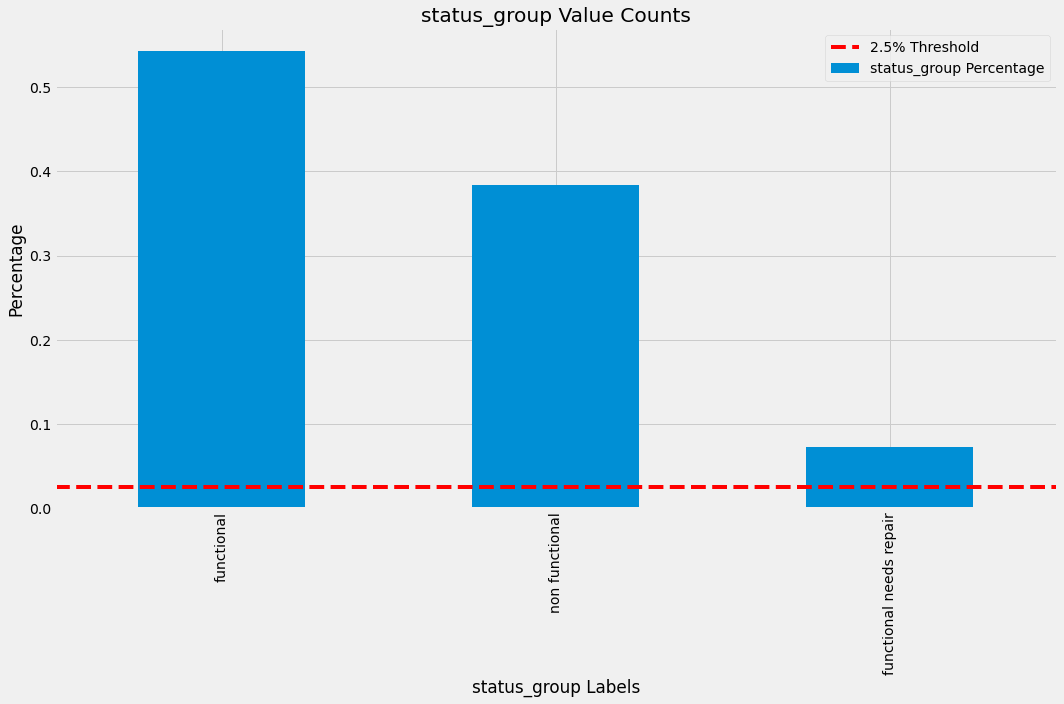

In [1853]:
col_eval(df_clean, cat_col=['status_group'])

> **OBSERVATIONS**
> - I believe "functional needs repair" is equivalent to "non functional" since it suggests the waterpoint has a failure but is still somehow functional. To me, functional with a failure means that the waterpoint is operating at a degraded state and not as optimal as it could.

> **ACTIONS**
> - I will combine "functional needs repair" to the "non functional" group which will simplify the modeling as well.

===============================================================================================================

> **SUMMARY OF ACTIONS TO TAKE**
> - recast `public_meeting` as string
> - recast `permit` as a string
> - drop `region_code`
> - drop `recorded_by`
> - drop `extraction_type_group`
> - drop `management_group`
> - drop `payment_type`
> - drop `quality_group`
> - drop `quantity_group`
> - drop `source_type`
> - drop `waterpoint_type_group`
> - impute `subvillage` and consolidate rare labels
> - impute 0's in `funder` and `installer` as "Unknown"
> - impute `public_meeting` missing values as "unknown"
> - impute null values in the `scheme_management` and `scheme_name` features as "Unknown"
> - impute `permit` nulls as "unknown"
> - rename `extraction_type_class` as `extraction_type_1` and `extraction_type` as `extraction_type_2` and rename labels
> - rename "soft" label to "soft-good" on `water_quality` feature
> - rename `source_class` as `source_type_1` and `source` as `source_type_2`
> - rename "functional needs repair" to "non functional" for the `status_group` feature
> - rename `payment` to `water_cost`
> - rename `quantity` as `water_quantity`
> - reduce cardinality in `funder` and `installer` features by consolidating rare labels

### Data Type Recasting

In [1854]:
#convert public meeting to string type
df_clean['public_meeting'] = df_clean['public_meeting'].astype(str)

In [1855]:
#convert permit to string type
df_clean['permit'] = df_clean['permit'].astype(str)

### Feature Drop

In [1856]:
#drop all categorical features outlined in feature evaluation
df_clean.drop(columns=['region_code','recorded_by','extraction_type_group',
                       'management_group','payment_type','quality_group',
                       'source_type','waterpoint_type_group'], 
              inplace=True)

In [1857]:
#update cat_cols
cat_cols = df_clean.select_dtypes(include='object').columns
cat_cols

Index(['id', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage',
       'region', 'district_code', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_class', 'management', 'payment', 'water_quality',
       'quantity', 'quantity_group', 'source', 'source_class',
       'waterpoint_type', 'status_group'],
      dtype='object')

### Feature and Label Renaming

In [1866]:
#rename extraction_type_class feature as extraction_type_1
df_clean.rename(columns={'extraction_type_class':'extraction_type_1'}, inplace=True)
#rename extraction_type feature as extraction_type_2
df_clean.rename(columns={'extraction_type':'extraction_type_2'}, inplace=True)
df_clean.groupby(by=['extraction_type_1', 'extraction_type_2']).count()

id   head  funder  \
extraction_type_1 extraction_type_2                                 
gravity           gravity                    26777  26777   26777   
handpump          afridev                     1770   1770    1770   
                  india mark ii               2399   2399    2399   
                  india mark iii                97     97      97   
                  nira/tanira                 8153   8153    8153   
                  other - mkulima/shinyanga      2      2       2   
                  other - play pump             85     85      85   
                  other - swn 81               229    229     229   
                  swn 80                      3669   3669    3669   
                  walimi                        48     48      48   
motorpump         cemo                          90     90      90   
                  climax                        32     32      32   
                  mono                        2865   2865    2865   
other             other                       6429   6429    6429   
rope pump         other - rope pump            450    450     450   
submersible       ksb                         1415   1415    1415   
                  submersible                 4764   4764    4764   
wind-powered      windmill                     117    117     117   

                                             well_elevation  installer  \
extraction_type_1 extraction_type_2                                      
gravity           gravity                             26777      26777   
handpump          afridev                              1770       1770   
                  india mark ii                        2399       2399   
                  india mark iii                         97         97   
                  nira/tanira                          8153       8153   
                  other - mkulima/shinyanga               2          2   
                  other - play pump                      85         85   
                  other - swn 81                        229        229   
                  swn 80                               3669       3669   
                  walimi                                 48         48   
motorpump         cemo                                   90         90   
                  climax                                 32         32   
                  mono                                 2865       2865   
other             other                                6429       6429   
rope pump         other - rope pump                     450        450   
submersible       ksb                                  1415       1415   
                  submersible                          4764       4764   
wind-powered      windmill                              117        117   

                                             longitude  latitude  wpt_name  \
extraction_type_1 extraction_type_2                                          
gravity           gravity                        26777     26777     26777   
handpump          afridev                         1770      1770      1770   
                  india mark ii                   2399      2399      2399   
                  india mark iii                    97        97        97   
                  nira/tanira                     8153      8153      8153   
                  other - mkulima/shinyanga          2         2         2   
                  other - play pump                 85        85        85   
                  other - swn 81                   229       229       229   
                  swn 80                          3669      3669      3669   
                  walimi                            48        48        48   
motorpump         cemo                              90        90        90   
                  climax                            32        32        32   
                  mono                            2865      2865      2865   
other           

In [1867]:
#rename labels in extraction_type_2
df_clean.loc[df_clean['extraction_type_2'] == 'other - mkulima/shinyanga',
             ['extraction_type_2']] = 'mkulima/shinyanga'

df_clean.loc[df_clean['extraction_type_2'] == 'other - play pump',
             ['extraction_type_2']] = 'play pump'

df_clean.loc[df_clean['extraction_type_2'] == 'other - swn 81',
             ['extraction_type_2']] = 'swn 81'

df_clean.loc[df_clean['extraction_type_2'] == 'other - rope pump',
             ['extraction_type_2']] = 'rope pump'

In [1868]:
#rename soft label as soft-good for water_quality feature
df_clean.loc[df_clean['water_quality'] == 'soft','water_quality'] = 'soft-good'

In [1869]:
#rename source features
df_clean.rename(columns={'source_class':'source_type_1',
                         'source':'source_type_2'},inplace=True)

In [1870]:
#update status_group labels
status_group_dict = {'functional':'functional',
                     'non functional':'non functional',
                     'functional needs repair':'non functional'}
df_clean['status_group'] = df_clean['status_group'].map(status_group_dict)
df_clean['status_group'].value_counts()

functional        32255
non functional    27136
Name: status_group, dtype: int64

In [1871]:
#rename payment to water_cost
df_clean.rename(columns={'payment':'water_cost'},inplace=True)

In [1872]:
#rename quantity to water_quantity
df_clean.rename(columns={'quantity':'water_quantity'}, inplace=True)

Column Name: funder


Number of unique values: 18


There are 59373 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 Rare                      28101
Government Of Tanzania     9083
Unknown                    4416
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1286
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
Norad                       765
Germany Republi             610
Tcrs                        602
Name: funder, dtype: int64




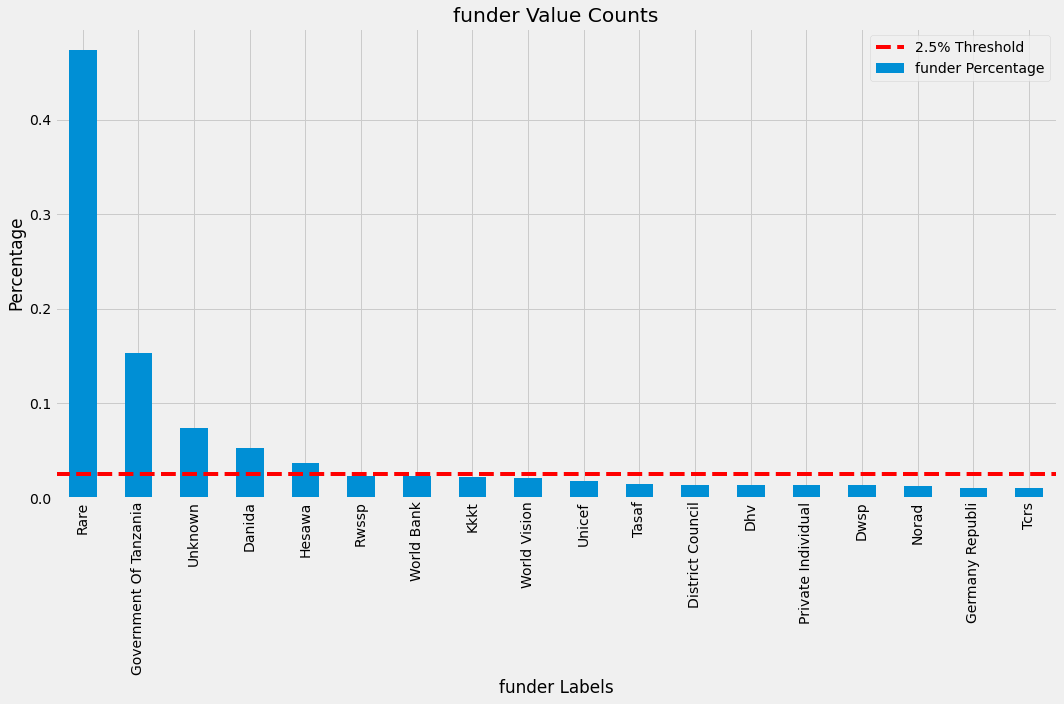

In [1873]:
#create 'other' consolidated label for funder
df_clean['funder'] = rare_labels(df_clean, 'funder', thresh=.01)
col_eval(df_clean, cat_col=['funder'])

Column Name: installer


Number of unique values: 12


There are 59379 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 Rare                  28738
DWE                   17400
Unknown                4435
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
TCRS                    707
Central government      622
CES                     610
Name: installer, dtype: int64




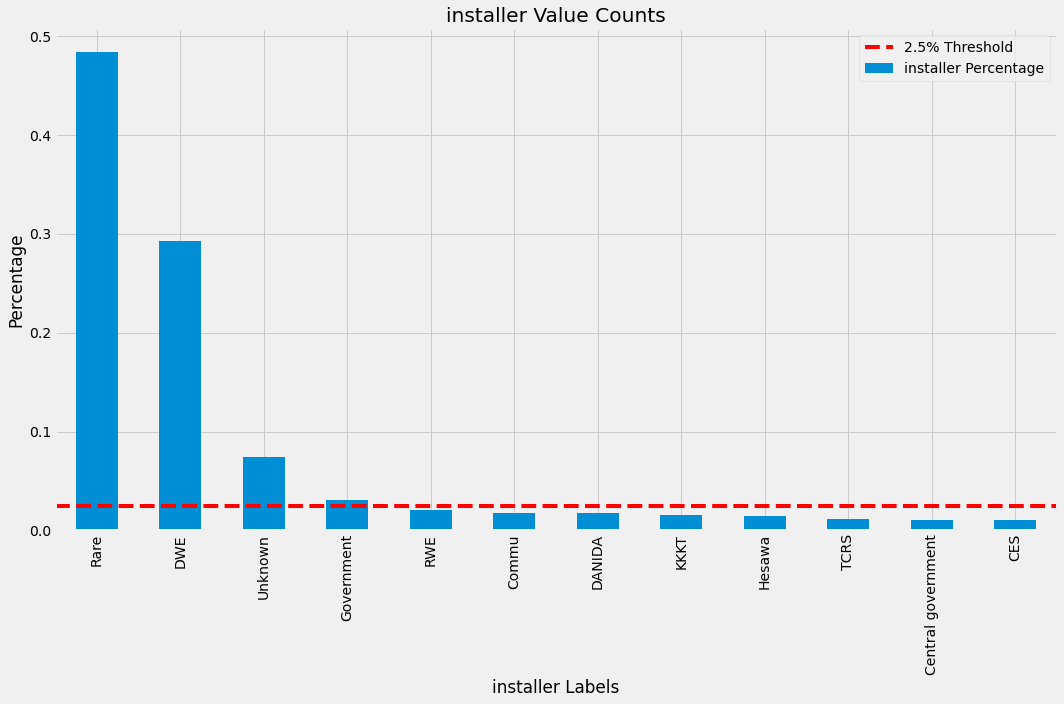

In [1874]:
#create 'other' consolidated label for installer
df_clean['installer'] = rare_labels(df_clean, 'installer', thresh=.01)
col_eval(df_clean, cat_col=['installer'])

In [1875]:
#update cat_cols
cat_cols = df_clean.select_dtypes(include='object').columns
cat_cols

Index(['id', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage',
       'region', 'district_code', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type_2',
       'extraction_type_1', 'management', 'water_cost', 'water_quality',
       'water_quantity', 'quantity_group', 'source_type_2', 'source_type_1',
       'waterpoint_type', 'status_group'],
      dtype='object')

In [1876]:
#reorder features
df_clean = df_clean[['id','wpt_name','construction_year','well_age',
                     'waterpoint_type','water_quality','water_quantity','head',
                     'source_type_1','source_type_2','extraction_type_1',
                     'extraction_type_2','well_elevation','population',
                     'status_group','latitude','longitude','basin',
                     'subvillage','region','district_code','lga','ward',
                     'funder','installer','permit','public_meeting',
                     'scheme_name','scheme_management','management','water_cost']]

In [1877]:
#state of the dataframe
df_clean

,id,wpt_name,construction_year,well_age,waterpoint_type,water_quality,water_quantity,head,source_type_1,source_type_2,extraction_type_1,extraction_type_2,well_elevation,population,status_group,latitude,longitude,basin,subvillage,region,district_code,lga,ward,funder,installer,permit,public_meeting,scheme_name,scheme_management,management,water_cost
0,69572,none,1999,14,communal standpipe,soft-good,enough,"6,000.0",groundwater,spring,gravity,gravity,1390,109,functional,-9.85632177,34.93809275,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,Rare,Rare,False,True,Roman,VWC,vwc,pay annually
1,8776,Zahanati,2010,3,communal standpipe,soft-good,insufficient,0.0,surface,rainwater harvesting,gravity,gravity,1399,280,functional,-2.14746569,34.6987661,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,Rare,Rare,True,Unknown,Unknown,Other,wug,never pay
2,34310,Kwa Mahundi,2009,4,communal standpipe multiple,soft-good,enough,25.0,surface,dam,gravity,gravity,686,250,functional,-3.82132853,37.46066446,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,Rare,Rare,True,True,Nyumba ya mungu pipe scheme,VWC,vwc,pay per bucket
3,67743,Zahanati Ya Nanyumbu,1986,27,communal standpipe multiple,soft-good,dry,0.0,groundwater,machine dbh,submersible,submersible,263,58,non functional,-11.15529772,38.48616088,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,Unicef,Rare,True,True,Unknown,VWC,vwc,never pay
4,19728,Shuleni,0,2013,communal standpipe,soft-good,seasonal,0.0,surface,rainwater harvesting,gravity,gravity,0,0,functional,-1.82535885,31.13084671,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,Rare,Rare,True,True,Unknown,Unknown,other,never pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,Area Three Namba 27,1999,14,communal standpipe,soft-good,enough,10.0,groundwater,spring,gravity,gravity,1210,125,functional,-3.25384746,37.16980689,Pangani,Kiduruni,Kilimanjaro,5,Hai,Masama Magharibi,Germany Republi,CES,True,True,Losaa Kia water supply,Water Board,water board,pay per bucket
59396,27263,Kwa Yahona Kuvala,1996,17,communal standpipe,soft-good,enough,"4,700.0",surface,river,gravity,gravity,1212,56,functional,-9.0706288,35.24999126,Rufiji,Igumbilo,Iringa,4,Njombe,Ikondo,Rare,Rare,True,True,Ikondo electrical water sch,VWC,vwc,pay annually
59397,37057,Mashine,0,2013,hand pump,fluoride,enough,0.0,groundwater,machine dbh,handpump,swn 80,0,0,functional,-8.75043433,34.01708706,Rufiji,Madungulu,Mbeya,7,Mbarali,Chimala,Unknown,Unknown,False,True,Unknown,VWC,vwc,pay monthly
59398,31282,Mshoro,0,2013,hand pump,soft-good,insufficient,0.0,groundwater,shallow well,handpump,nira/tanira,0,0,functional,-6.37857327,35.86131531,Rufiji,Mwinyi,Dodoma,4,Chamwino,Mvumi Makulu,Rare,Rare,True,True,Unknown,VWC,vwc,never pay


# DATA EXPLORATION

In this section I will explore the clean data to try and examine insights that will help my stakeholder understand the reliability of the water wells.

# MODELING

## Pre-Processing

In [ ]:
#impute construction year with median
imputer = SimpleImputer(missing_values=0, strategy='median')



### Feature Imputation

I will investigate how to best impute both missing values and 0's, which I believe are placeholders for missing values.

In [1908]:
#investigate if there are any null values
df_clean[num_cols].isna().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
population           0
construction_year    0
dtype: int64

> **OBSERVATIONS**
> - There are no null values in numerical columns

===============================================================================================================

Column Name: construction_year


Number of unique values: 54


There are 38637 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 2010   7.000000000000001
2008   7.000000000000001
2009   7.000000000000001
2000                 5.0
2007                 4.0
2006                 4.0
2003                 3.0
2011                 3.0
2004                 3.0
2012                 3.0
2002                 3.0
1978                 3.0
1995                 3.0
2005                 3.0
1999                 3.0
1998                 2.0
1990                 2.0
1985                 2.0
1996                 2.0
1980                 2.0
1984                 2.0
1982                 2.0
1994                 2.0
1972                 2.0
1974                 2.0
1997                 2.0
1992                 2.0
1993                 2.0
2001                 1.0
1988                 1.0
1983                 1.0
1975                 1.0
1986                 1.0
1976       

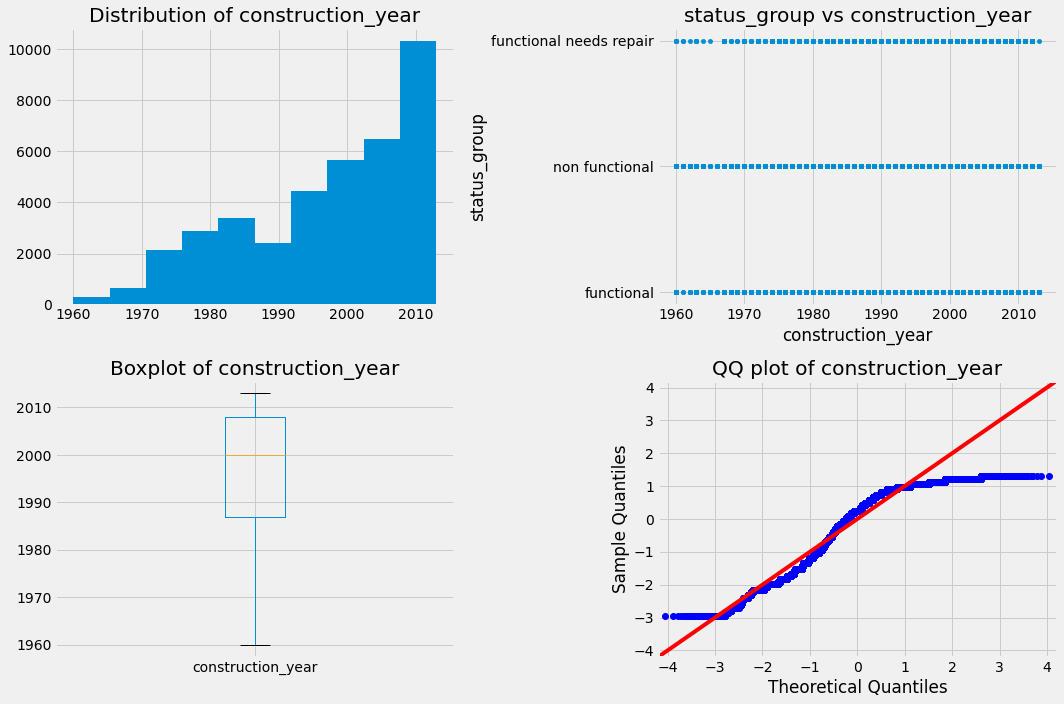

In [1950]:
#eval construction_year for imputing 0's
const_yr_0 = df_clean.loc[df_clean['construction_year'] == 0]
const_yr_not_0 = df_clean.loc[df_clean['construction_year'] != 0]
col_eval(const_yr_not_0, num_col='construction_year')

In [1988]:
df_clean.groupby('installer').median()[['construction_year']]

,construction_year
installer,
-,0.0
0,"2,000.0"
A.D.B,0.0
AAR,0.0
ABASIA,"1,985.0"
...,...
water board,"2,007.0"
wizara ya maji,"1,986.0"
world,0.0


> **OBSERVATIONS**
> - Distribution of `construction_year` with the 0's removed is not normal, therefore, I will utilize the median for imputation.

### Feature Imputation

In [1858]:
#rename subvillage nulls as "unknown"
df_clean.loc[df_clean['subvillage'].isna() == True, ['subvillage']] = 'Unknown'
df_clean['subvillage'].value_counts(dropna=False)

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Unknown           371
                 ... 
Kirika B            1
Ilengititu Kat      1
Pangwe              1
Kampimbi            1
Mahoha Bondeni      1
Name: subvillage, Length: 19287, dtype: int64

In [1859]:
#rename funder nulls as "unknown"
df_clean.loc[df_clean['funder'].isna() == True, ['funder']] = 'Unknown'
df_clean['funder'].value_counts(dropna=False)

Government Of Tanzania    9083
Unknown                   3639
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Kaaya                        1
Arabi                        1
Rc/dwe                       1
Maliasili                    1
Norani                       1
Name: funder, Length: 1896, dtype: int64

In [1860]:
#rename installer nulls as "unknown"
df_clean.loc[df_clean['installer'].isna() == True, ['installer']] = 'Unknown'
df_clean['installer'].value_counts(dropna=False)

DWE                   17400
Unknown                3658
Government             1825
RWE                    1206
Commu                  1060
                      ...  
Deogra                    1
Obadia                    1
TASAF and Comunity        1
Hesewa                    1
J mal Abdallah            1
Name: installer, Length: 2143, dtype: int64

Column Name: funder


Number of unique values: 1895


There are 57496 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 Government Of Tanzania    9083
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Kaaya                        1
Arabi                        1
Rc/dwe                       1
Maliasili                    1
Norani                       1
Name: funder, Length: 1895, dtype: int64




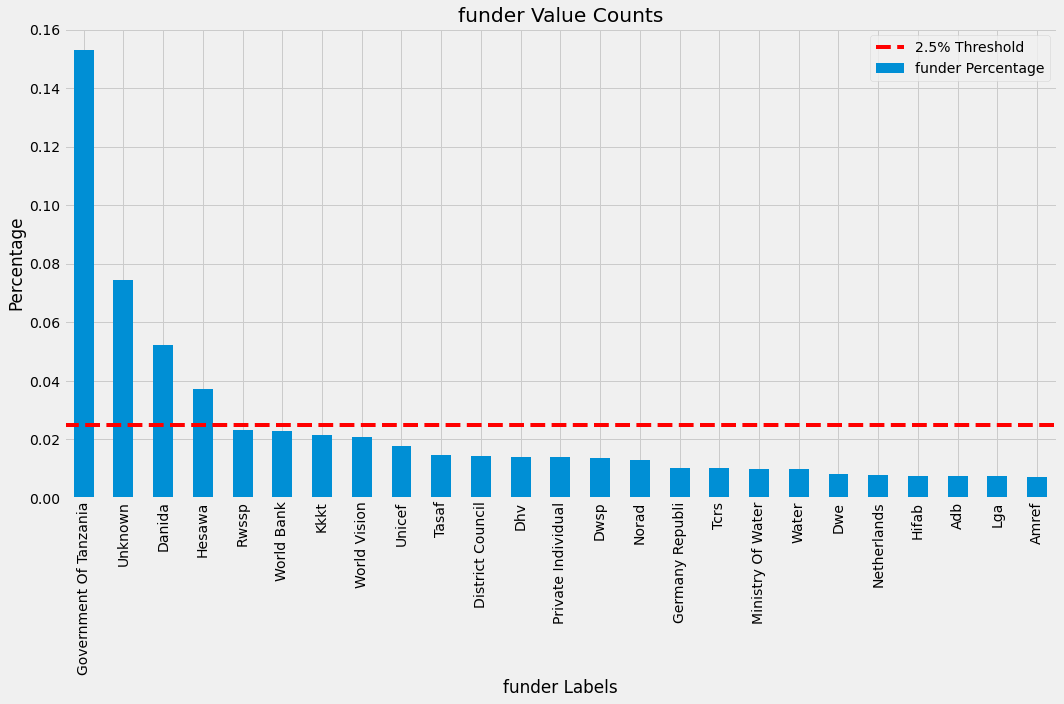

Column Name: installer


Number of unique values: 2142


There are 57249 duplicates


There are 0 null values


There are 0 zeros


Value Counts Percentage 
 DWE                             17400
Unknown                          4435
Government                       1825
RWE                              1206
Commu                            1060
                                ...  
Te                                  1
Msuba                               1
GLOBAL RESOURCE CONSTRUCTION        1
Red cross                           1
Mahita                              1
Name: installer, Length: 2142, dtype: int64




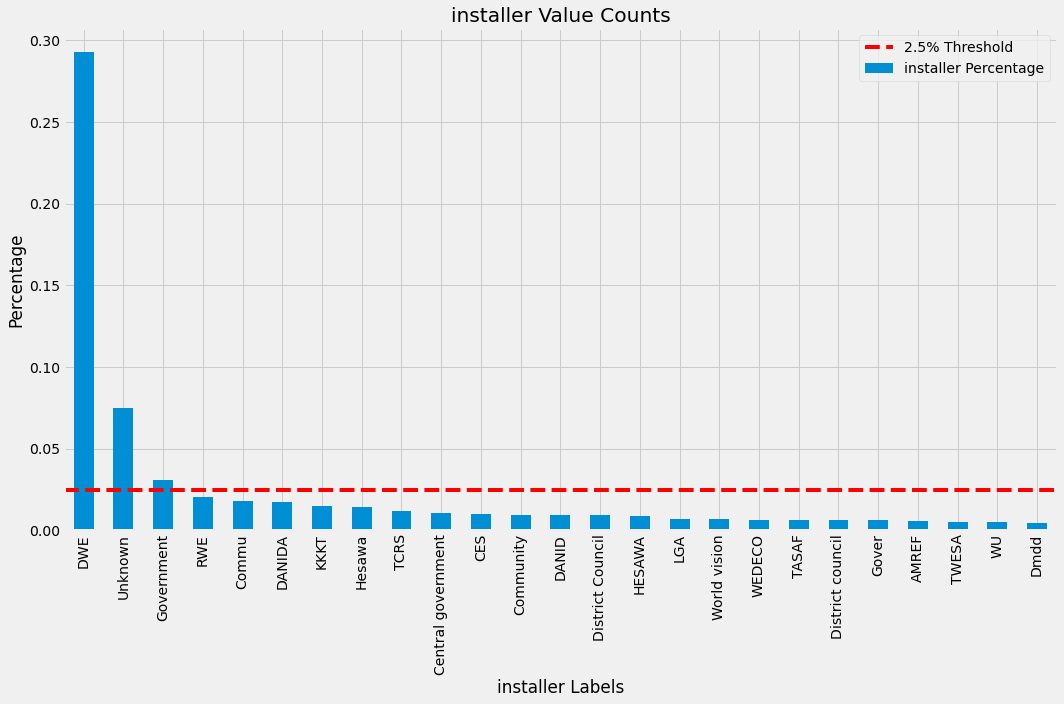

In [1861]:
#change "0" label to "Unknown" for funder and installer features
df_clean.loc[df_clean['funder'] == '0',['funder']] = 'Unknown'
df_clean.loc[df_clean['installer'] == '0',['installer']] = 'Unknown'
col_eval(df_clean, cat_col=['funder','installer'])

In [1862]:
#rename permit nulls as "unknown"
df_clean.loc[df_clean['public_meeting'] == 'nan', ['public_meeting']] = 'Unknown'
df_clean['public_meeting'].value_counts(dropna=False)

True       51003
False       5055
Unknown     3333
Name: public_meeting, dtype: int64

In [1863]:
#rename the scheme_management nulls as "unknown"
df_clean.loc[df_clean['scheme_management'].isna() == True, ['scheme_management']] = 'Unknown'
df_clean['scheme_management'].value_counts(dropna=False)

VWC                 36786
WUG                  5206
Unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1062
Company              1061
Other                 765
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [1864]:
#rename the scheme_name nulls as "unknown"
df_clean.loc[df_clean['scheme_name'].isna() == True, ['scheme_name']] = 'Unknown'
df_clean['scheme_name'].value_counts(dropna=False)

Unknown                         28160
K                                 682
None                              644
Borehole                          545
Chalinze wate                     405
                                ...  
Submersible                         1
TM part Two                         1
TC                                  1
Nkoarua gravity water supply        1
Dons                                1
Name: scheme_name, Length: 2697, dtype: int64

In [1865]:
#rename permit 'nan' as "unknown"
df_clean.loc[df_clean['permit'] == 'nan', ['permit']] = 'Unknown'
df_clean['permit'].value_counts(dropna=False)

True       38849
False      17486
Unknown     3056
Name: permit, dtype: int64